In [1]:
import pandas as pd
from tqdm.notebook import tqdm

# Load the CSV file
file_path = 'MLE-Assignment.csv'
df = pd.read_csv(file_path)

# Check the first few rows to understand the structure
df.head()

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  

[5 rows x 450 columns]

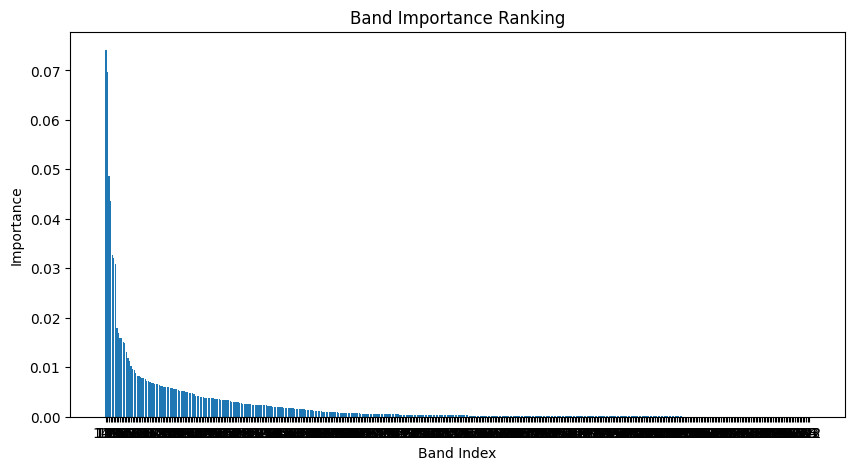

Index(['149', '136', '159', '123', '48', '160', '127', '140', '137', '124',
       '150', '50', '61', '33', '68', '43', '60', '126', '51', '130', '161',
       '49', '31', '120', '36', '351', '411', '1', '67', '132', '203', '143',
       '55', '69', '146', '128', '290', '78', '114', '109', '318', '355',
       '430', '28', '45', '431', '37', '113', '429', '79', '445', '46', '153',
       '156', '133', '242', '443', '305', '377', '392', '324', '199', '134',
       '142', '285', '144', '408', '372', '296', '266', '75', '38', '135',
       '256', '202', '417', '11', '348', '23', '359', '151', '255', '117',
       '440', '13', '368', '406', '52', '62', '253', '234', '16', '424', '64',
       '121', '250', '383', '195', '184', '10'],
      dtype='object')
Top 100 Bands selected and saved as 'filtered_hsi_data.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load Data
d = pd.read_csv('MLE-Assignment.csv')

# Extract Bands and Target
bands = d.iloc[:, 1:-1]
target = d['vomitoxin_ppb']

# Standardize Data
scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands)

# Random Forest for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(bands_scaled, target)

# Extract Feature Importances
importances = rf_model.feature_importances_

# Sort by Importance
sorted_indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.title("Band Importance Ranking")
plt.bar(range(bands.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(bands.shape[1]), sorted_indices)
plt.xlabel("Band Index")
plt.ylabel("Importance")
plt.show()

# Select Top 50 Most Important Bands
selected_bands = bands.iloc[:, sorted_indices[:100]]
print(selected_bands.columns)
# # Save Filtered Dataset
# filtered_data = pd.concat([selected_bands, target], axis=1)
# filtered_data.to_csv("/mnt/data/filtered_hsi_data.csv", index=False)

print("Top 100 Bands selected and saved as 'filtered_hsi_data.csv'")

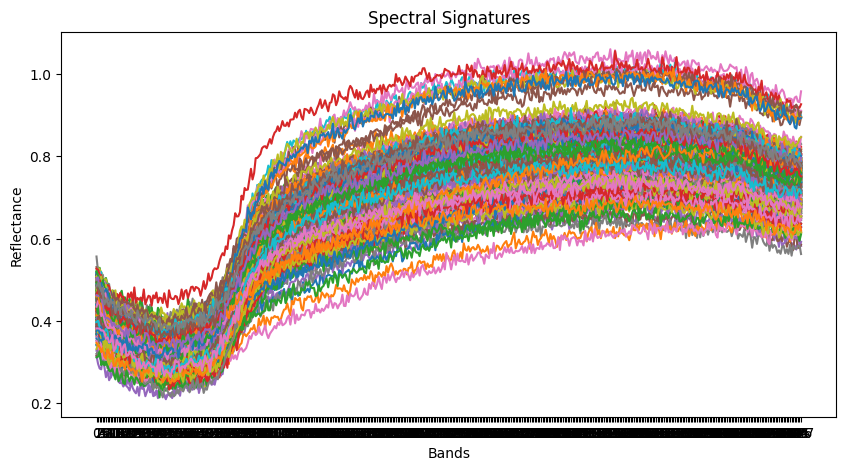

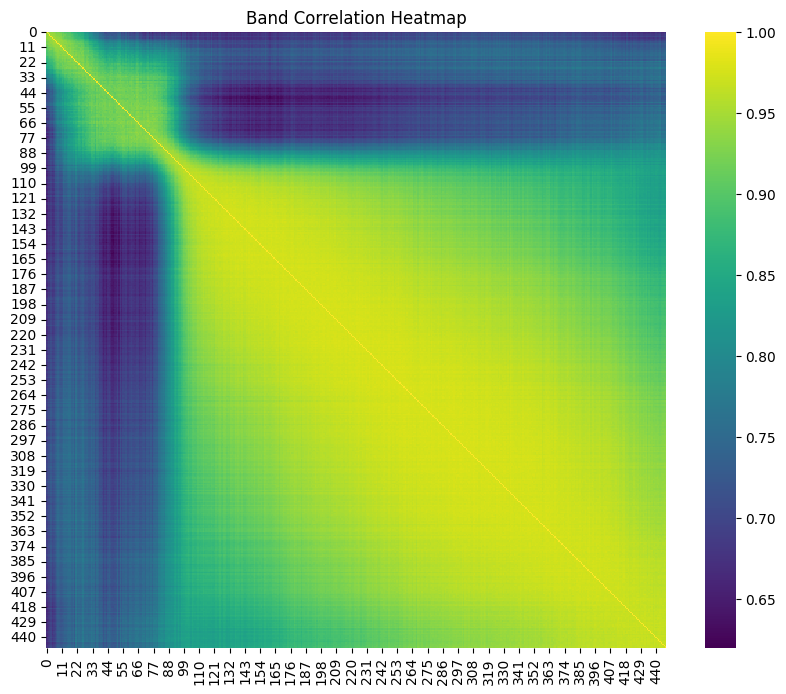

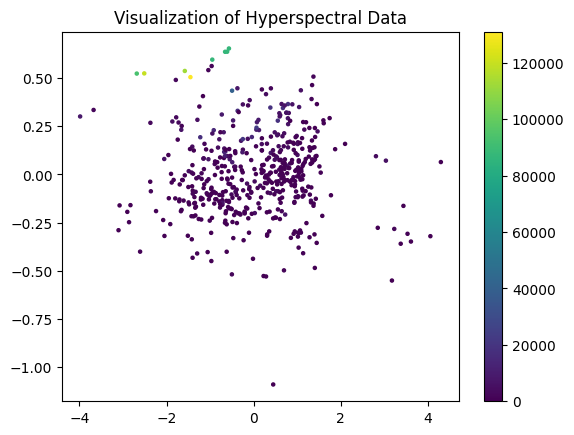

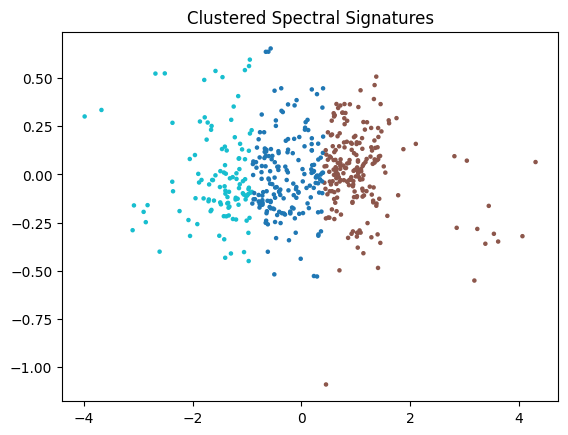

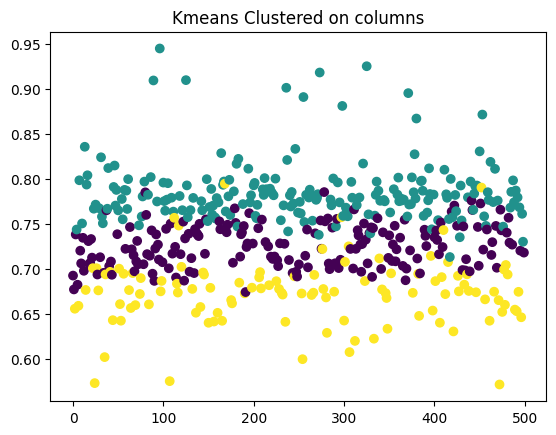

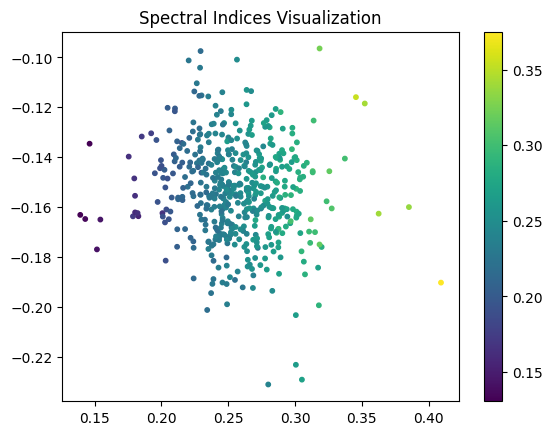

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Extract band columns (448 bands from 0 to 447)
bands = df.columns[1:449]

# Step 1: Visualize Spectral Signatures
plt.figure(figsize=(10, 5))
for i in range(448):
    plt.plot(bands, df.iloc[i][bands], label=f'Crop {i}')
plt.xlabel('Bands')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures')
# plt.legend()
plt.show()

# Step 2: Band Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[bands].corr(), cmap='viridis')
plt.title('Band Correlation Heatmap')
plt.show()

# Step 3: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[bands])

# Visualization
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['vomitoxin_ppb'], cmap='viridis', s=5)
plt.title('Visualization of Hyperspectral Data')
plt.colorbar()
plt.show()

# Step 4: Remove Noisy Bands
variance = df[bands].var()
selected_bands = variance.index
df_filtered = df[selected_bands]

# Step 5: Cluster Spectral Signatures
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_filtered)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='tab10', s=5)
plt.title('Clustered Spectral Signatures')
plt.show()

col = '444'
x = df[col].index.copy()
y = df[col].copy()
y[y > 15000] = 15000
plt.scatter(x, y, c=df['Cluster'], cmap='viridis')
plt.title('Kmeans Clustered on columns')
plt.show()

# Step 6: Generate Spectral Indices (NDVI, NDWI, SAVI)
# red_band = '100'  # Example red band
# nir_band = '200'  # Example NIR band
# swir_band = '350' # Example SWIR band

red_band = '40'  # Example red band
nir_band = '100'  # Example NIR band
swir_band = '200' # Example SWIR band

# NDVI
df['NDVI'] = (df[nir_band] - df[red_band]) / (df[nir_band] + df[red_band])
# NDWI
df['NDWI'] = (df[nir_band] - df[swir_band]) / (df[nir_band] + df[swir_band])
# SAVI
L = 0.5
df['SAVI'] = (df[nir_band] - df[red_band]) / (df[nir_band] + df[red_band] + L) * (1 + L)

plt.scatter(df['NDVI'], df['NDWI'], c=df['SAVI'], cmap='viridis', s=10)
plt.title('Spectral Indices Visualization')
plt.colorbar()
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


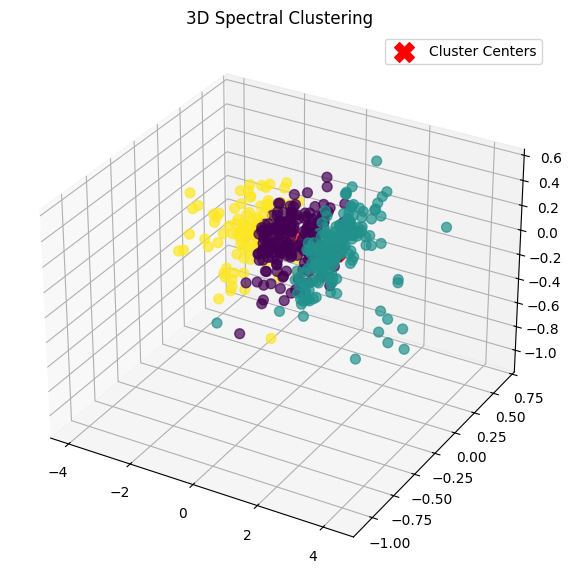

In [4]:
# Extract the reflectance data (bands 0 to 447)
band_columns = [str(i) for i in range(448)]  # Assuming bands are from 0 to 447
reflectance_data = df[band_columns]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reflectance_data)

# Perform PCA to reduce dimensions to 3D
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(reflectance_data)

# Plotting the 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)

# Plot the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Cluster Centers')

# Plot settings
plt.title('3D Spectral Clustering')
plt.legend()
plt.show()

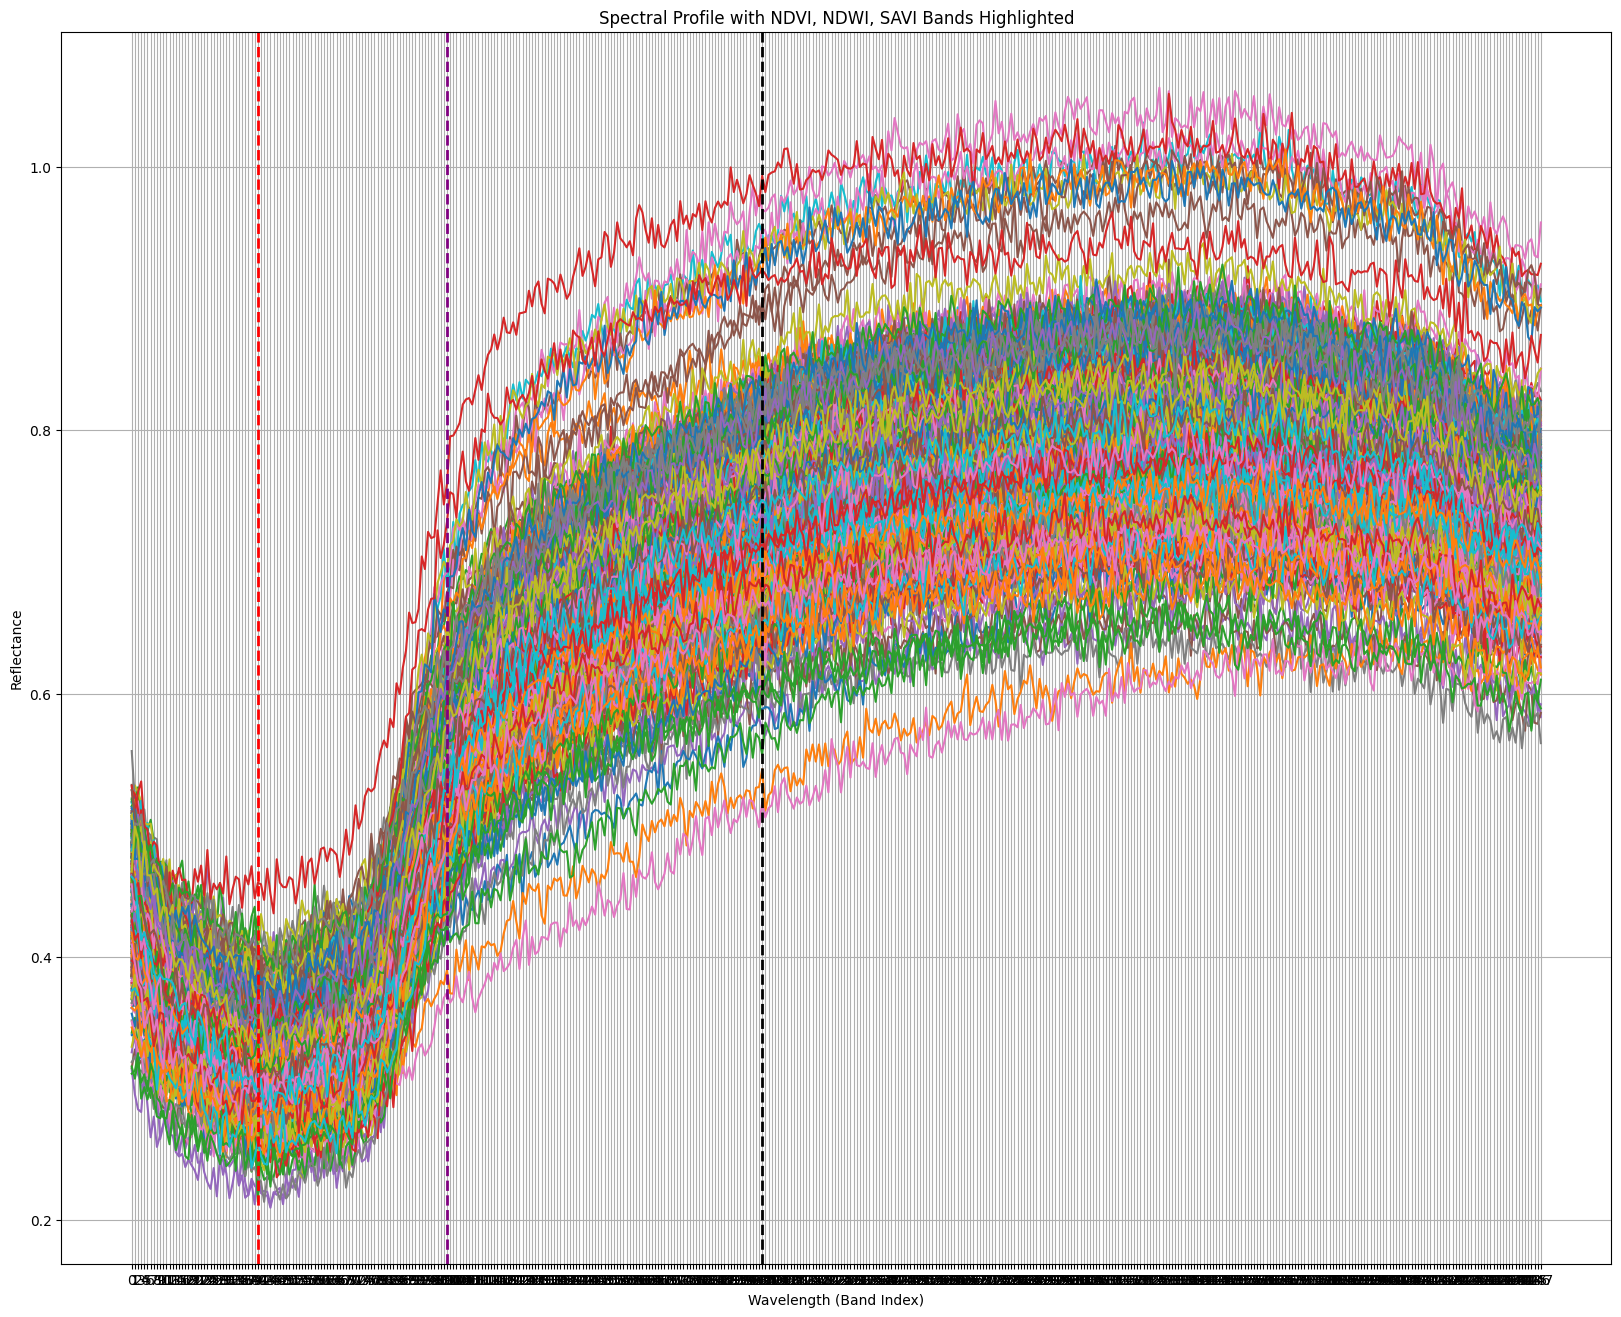

In [5]:
# Load the data
data = pd.read_csv('MLE-Assignment.csv')

# Extract the band columns (0 to 447)
band_columns = [str(i) for i in range(448)]  # Assuming bands are from 0 to 447
reflectance_data = data[band_columns]

# Plot the spectral profile
plt.figure(figsize=(20, 16))
for i in range(len(reflectance_data)):
    plt.plot(reflectance_data.columns, reflectance_data.iloc[i], label=data['hsi_id'][i])

# Add vertical lines for Red, NIR, and SWIR bands
plt.axvline(x=int(red_band), color='red', linestyle='--', linewidth=2, label='Red Band (600 nm)')
plt.axvline(x=int(nir_band), color='purple', linestyle='--', linewidth=2, label='NIR Band (900 nm)')
plt.axvline(x=int(swir_band), color='black', linestyle='--', linewidth=2, label='SWIR Band (1400 nm)')

# Add Labels
plt.xlabel('Wavelength (Band Index)')
plt.ylabel('Reflectance')
plt.title('Spectral Profile with NDVI, NDWI, SAVI Bands Highlighted')
plt.grid(True)
# plt.legend(loc='upper right')
plt.show()

In [6]:
data.describe()

0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.043773    0.043659    0.043442  ...    0.053479   
min      0.262876    0.278523    0.255529    0.261459  ...    0.562662   
25%      0.369620    0.364823    0.360634    0.355246  ...    0.702105   
50%      0.405443    0.397917    0.393803    0.387211  ...    0.743857   
75%      0.444384    0.438728    0.431165    0.427039  ...    0.777884   
max      0.504054    0.490692    0.489272    0.472080  ...    0.940642   

              440         441         442         443         444         445  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.740818    0.740459    0.739758    0.739850    0.738738    0.738298   
std      0.053695    0.053812    0.053666    0.053487    0.053601    0.054014   
min      0.585011    0.558412    0.571735    0.575259    0.571767    0.577803   
25%      0.703701    0.702988    0.700889    0.701690    0.700638    0.698655   
50%      0.745922    0.745062    0.743991    0.744004    0.743965    0.743301   
75%      0.776210    0.777069    0.774759    0.775698    0.775686    0.775621   
max      0.940361    0.939153    0.930366    0.942615    0.945225    0.932812   

              446         447  vomitoxin_ppb  
count  500.000000  500.000000     500.000000  
mean     0.737599    0.738099    3410.006000  
std      0.054136    0.054297   13095.803483  
min      0.576985    0.562302       0.000000  
25%      0.698107    0.699673     137.500000  
50%      0.745216    0.745733     500.000000  
75%      0.774635    0.774310    1700.000000  
max      0.931381    0.957860  131000.000000  

[8 rows x 449 columns]

In [7]:
df.describe()

0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         443  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.739850   
std      0.044528    0.043773    0.043659    0.043442  ...    0.053487   
min      0.262876    0.278523    0.255529    0.261459  ...    0.575259   
25%      0.369620    0.364823    0.360634    0.355246  ...    0.701690   
50%      0.405443    0.397917    0.393803    0.387211  ...    0.744004   
75%      0.444384    0.438728    0.431165    0.427039  ...    0.775698   
max      0.504054    0.490692    0.489272    0.472080  ...    0.942615   

              444         445         446         447  vomitoxin_ppb  \
count  500.000000  500.000000  500.000000  500.000000     500.000000   
mean     0.738738    0.738298    0.737599    0.738099    3410.006000   
std      0.053601    0.054014    0.054136    0.054297   13095.803483   
min      0.571767    0.577803    0.576985    0.562302       0.000000   
25%      0.700638    0.698655    0.698107    0.699673     137.500000   
50%      0.743965    0.743301    0.745216    0.745733     500.000000   
75%      0.775686    0.775621    0.774635    0.774310    1700.000000   
max      0.945225    0.932812    0.931381    0.957860  131000.000000   

          Cluster        NDVI        NDWI        SAVI  
count  500.000000  500.000000  500.000000  500.000000  
mean     0.864000    0.256235   -0.153659    0.243793  
std      0.755411    0.033430    0.019037    0.031017  
min      0.000000    0.139211   -0.231197    0.130617  
25%      0.000000    0.237317   -0.165292    0.227739  
50%      1.000000    0.254451   -0.153827    0.242510  
75%      1.000000    0.278761   -0.141215    0.262338  
max      2.000000    0.409226   -0.096419    0.375090  

[8 rows x 453 columns]

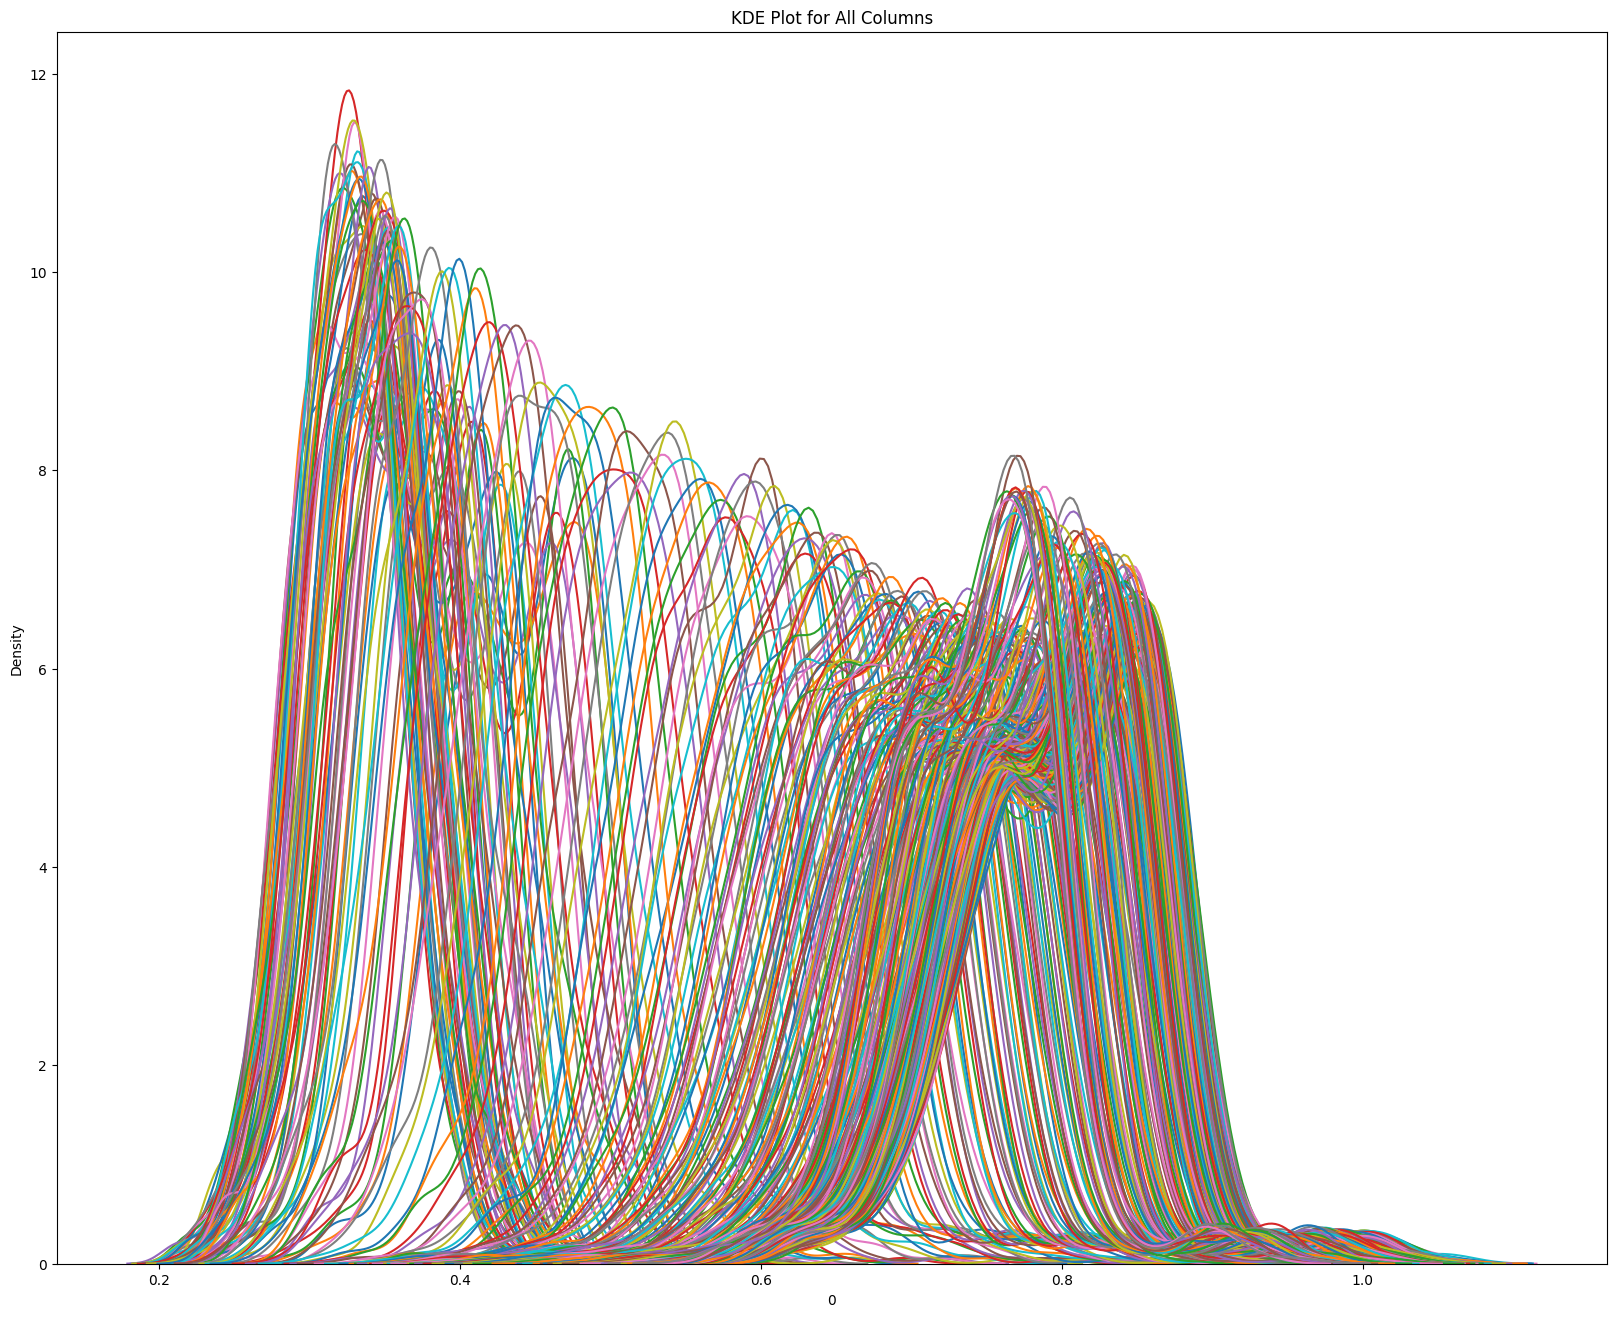

In [8]:
plt.figure(figsize=(20, 16))

# KDE plot for each column
for column in df.columns[1:-5]:  # Skipping 'hsi_id' and 'vomitoxin_ppb'
    sns.kdeplot(df[column], label=column)

# plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("KDE Plot for All Columns")
plt.show()

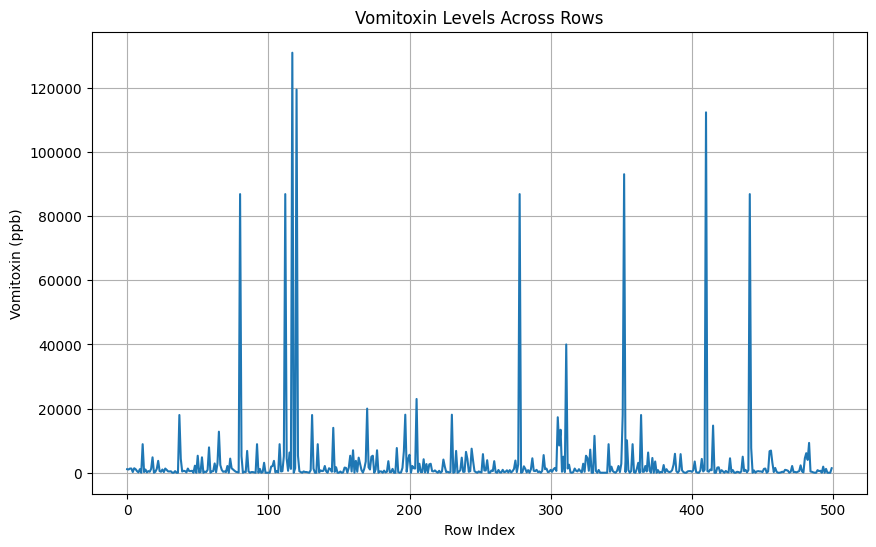

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(df['vomitoxin_ppb'])
plt.title("Vomitoxin Levels Across Rows")
plt.xlabel("Row Index")
plt.ylabel("Vomitoxin (ppb)")
plt.grid(True)
plt.show()

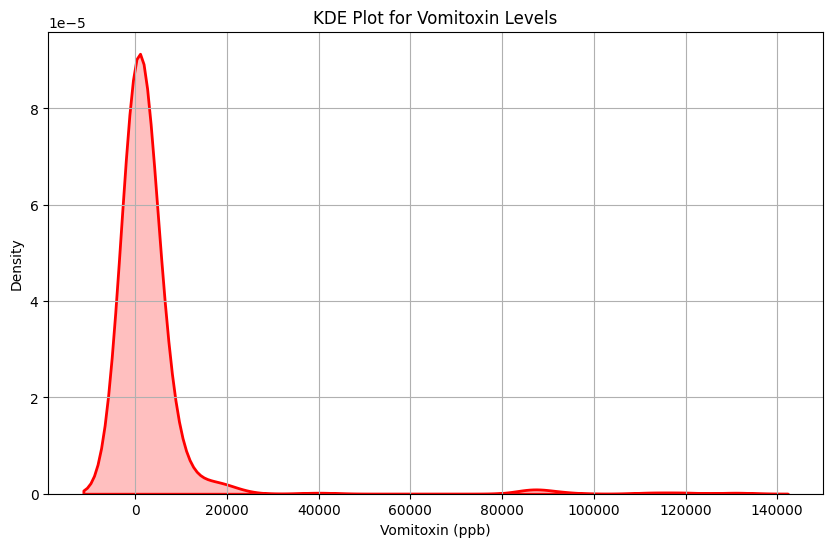

In [10]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['vomitoxin_ppb'], color='red', fill=True, linewidth=2)
plt.title("KDE Plot for Vomitoxin Levels")
plt.xlabel("Vomitoxin (ppb)")
plt.grid(True)
plt.show()

In [11]:
df['Cluster'].value_counts()

1    206
0    181
2    113
Name: Cluster, dtype: int64

In [12]:
df_high_vomitoxin = df[df['vomitoxin_ppb'] > 15000]
df_high_vomitoxin

hsi_id         0         1         2         3         4  \
37    imagoai_corn_37  0.471177  0.496230  0.468780  0.485214  0.452672   
80    imagoai_corn_80  0.460773  0.463556  0.434175  0.438172  0.433866   
112  imagoai_corn_112  0.428913  0.417999  0.423014  0.435502  0.409847   
117  imagoai_corn_117  0.401392  0.388340  0.374649  0.370445  0.356339   
120  imagoai_corn_120  0.360911  0.365350  0.362183  0.338554  0.329039   
131  imagoai_corn_131  0.454228  0.466216  0.446806  0.449274  0.431980   
170  imagoai_corn_170  0.450694  0.464852  0.458474  0.451489  0.447340   
197  imagoai_corn_197  0.496358  0.492878  0.478654  0.492247  0.473738   
205  imagoai_corn_205  0.466291  0.476235  0.456065  0.477684  0.460214   
230  imagoai_corn_230  0.490194  0.496805  0.494542  0.491431  0.470333   
278  imagoai_corn_278  0.447389  0.442174  0.463869  0.423604  0.423555   
305  imagoai_corn_305  0.386052  0.362722  0.368605  0.367415  0.373618   
311  imagoai_corn_311  0.458668  0.425737  0.426963  0.415822  0.423994   
351  imagoai_corn_351  0.494087  0.473022  0.458527  0.477982  0.460040   
352  imagoai_corn_352  0.385004  0.388117  0.372504  0.363721  0.347926   
364  imagoai_corn_364  0.500819  0.490121  0.507978  0.487429  0.467661   
410  imagoai_corn_410  0.368390  0.380004  0.351589  0.353492  0.346155   
441  imagoai_corn_441  0.459627  0.467563  0.442562  0.441275  0.420249   

            5         6         7         8  ...       443       444  \
37   0.454548  0.431565  0.447490  0.428709  ...  0.756018  0.765347   
80   0.420138  0.415908  0.430765  0.402079  ...  0.798716  0.785337   
112  0.416998  0.402489  0.404015  0.403642  ...  0.769088  0.757034   
117  0.362410  0.342712  0.359716  0.350826  ...  0.762502  0.748392   
120  0.330663  0.313815  0.327695  0.310658  ...  0.679626  0.702525   
131  0.458834  0.416883  0.419906  0.427830  ...  0.732433  0.712149   
170  0.442303  0.424081  0.440629  0.420624  ...  0.742179  0.740956   
197  0.478951  0.465243  0.456559  0.429340  ...  0.777541  0.782065   
205  0.447743  0.444092  0.445662  0.418224  ...  0.778662  0.745433   
230  0.481777  0.460720  0.449774  0.448757  ...  0.778686  0.754310   
278  0.420084  0.429355  0.412421  0.402431  ...  0.775664  0.785611   
305  0.344031  0.344526  0.349195  0.329503  ...  0.724788  0.725315   
311  0.421412  0.407219  0.419119  0.403343  ...  0.763080  0.766356   
351  0.466032  0.447664  0.453609  0.427871  ...  0.773857  0.762972   
352  0.353393  0.332766  0.326495  0.329341  ...  0.681501  0.695303   
364  0.468469  0.475314  0.454415  0.462820  ...  0.793457  0.776316   
410  0.352513  0.355067  0.350281  0.346992  ...  0.742569  0.743397   
441  0.424492  0.427043  0.411879  0.397719  ...  0.773507  0.776205   

          445       446       447  vomitoxin_ppb  Cluster      NDVI      NDWI  \
37   0.747267  0.749461  0.767241        18000.0        0  0.178671 -0.163754   
80   0.773243  0.789825  0.766589        86900.0        0  0.142932 -0.164819   
112  0.745370  0.756538  0.766544        86900.0        2  0.151701 -0.177017   
117  0.746828  0.754780  0.760388       131000.0        2  0.180219 -0.155509   
120  0.717103  0.692456  0.679353       119500.0        2  0.180263 -0.162180   
131  0.717885  0.725051  0.752445        18000.0        0  0.198935 -0.144461   
170  0.740136  0.751336  0.736617        20000.0        0  0.238550 -0.148339   
197  0.774517  0.772248  0.758958        18100.0        1  0.263658 -0.118802   
205  0.762119  0.775111  0.771325        23000.0        0  0.215713 -0.157241   
230  0.783546  0.769667  0.784066        18100.0        1  0.195054 -0.146470   
278  0.783954  0.770274  0.771954        86900.0        0  0.154265 -0.165043   
305  0.734966  0.733182  0.743686        17300.0        2  0.233520 -0.154128   
311  0.761913  0.760887  0.790901        40000.0        0  0.208609 -0.146546   
351  0.783773  0.756408  0.771266        18100.0        1  0.241467 -0.122997   
352  

In [13]:
df_group = df.groupby('Cluster').mean()
df_group

C:\Users\Asus\AppData\Local\Temp\ipykernel_23392\1186680801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('Cluster').mean()


0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.437408  0.434477  0.427474  0.418256  0.412019  0.405362  0.398781   
1        0.475345  0.474749  0.467748  0.461572  0.453157  0.446547  0.440361   
2        0.393514  0.388866  0.382108  0.374094  0.367869  0.361564  0.354340   

                7         8         9  ...       442       443       444  \
Cluster                                ...                                 
0        0.392499  0.386318  0.381853  ...  0.727953  0.727206  0.725986   
1        0.433927  0.428652  0.424123  ...  0.785938  0.786352  0.785282   
2        0.349348  0.343302  0.339355  ...  0.674479  0.675327  0.674313   

              445       446       447  vomitoxin_ppb      NDVI      NDWI  \
Cluster                                                                    
0        0.724920  0.725224  0.725801    3800.883978  0.258477 -0.153271   
1        0.785786  0.784687  0.784797    1522.538835  0.254755 -0.153451   
2        0.673155  0.671578  0.672670    6224.778761  0.255342 -0.154657   

             SAVI  
Cluster            
0        0.244597  
1        0.249428  
2        0.232232  

[3 rows x 452 columns]

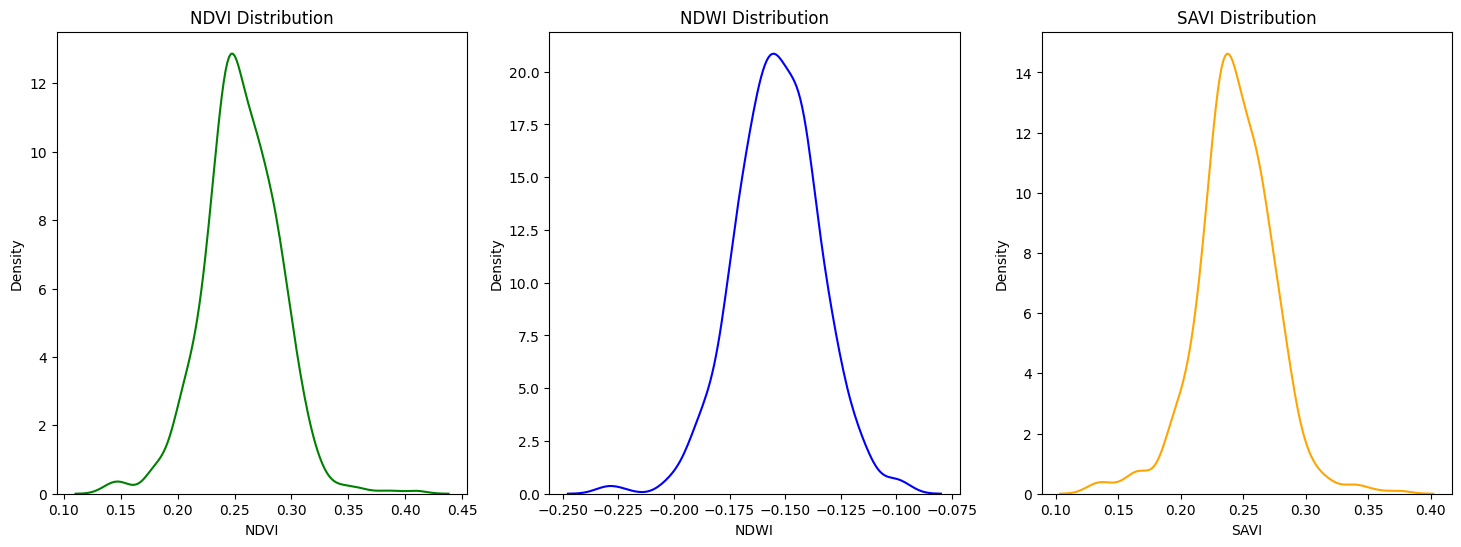

In [14]:
plt.figure(figsize=(18, 6))

# Plot NDVI
plt.subplot(1, 3, 1)
sns.kdeplot(df['NDVI'], color='green')
plt.title('NDVI Distribution')

# Plot NDWI
plt.subplot(1, 3, 2)
sns.kdeplot(df['NDWI'], color='blue')
plt.title('NDWI Distribution')

# Plot SAVI
plt.subplot(1, 3, 3)
sns.kdeplot(df['SAVI'], color='orange')
plt.title('SAVI Distribution')

plt.show()

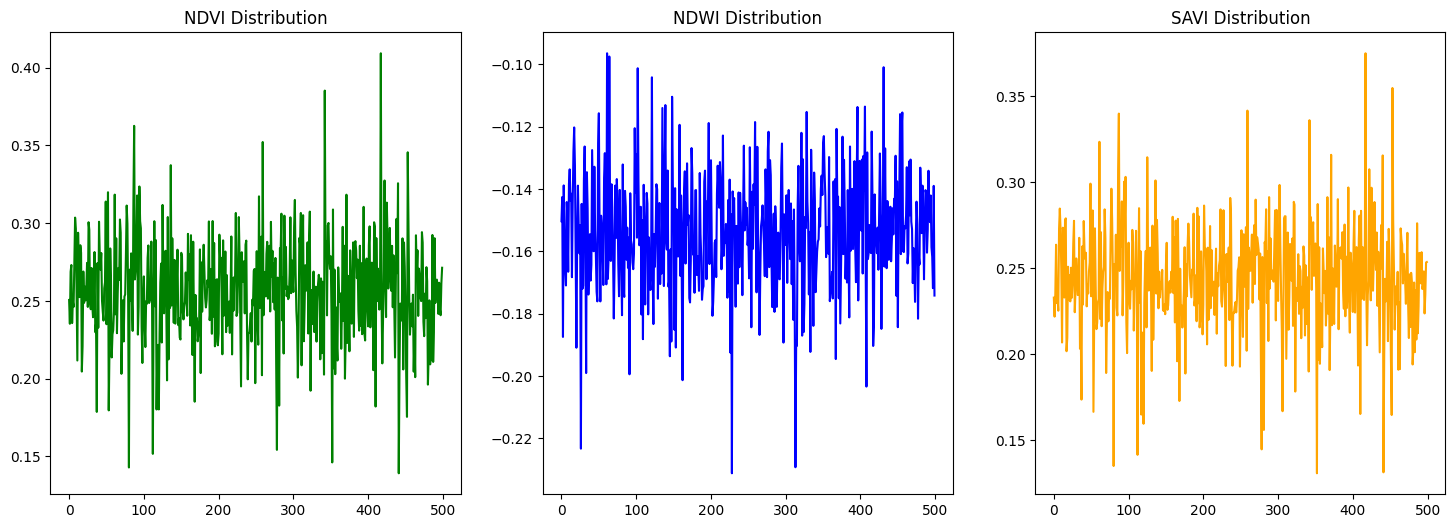

In [15]:
plt.figure(figsize=(18, 6))

# Plot NDVI
plt.subplot(1, 3, 1)
plt.plot(df['NDVI'], color='green')
plt.title('NDVI Distribution')

# Plot NDWI
plt.subplot(1, 3, 2)
plt.plot(df['NDWI'], color='blue')
plt.title('NDWI Distribution')

# Plot SAVI
plt.subplot(1, 3, 3)
plt.plot(df['SAVI'], color='orange')
plt.title('SAVI Distribution')

plt.show()

In [16]:
def detect_outliers(df, threshold=5):
    for col in tqdm(df.columns, desc = 'Detecting Outliers'):
        # Calculate Z-score
        z_score = (df[col] - df[col].mean()) / df[col].std()
        
        # Outliers DataFrame
        outliers = df[z_score.abs() > 3]
        
        # Calculate min and max acceptable range
        min_acceptable = df[col].mean() - 3 * df[col].std()
        max_acceptable = df[col].mean() + 3 * df[col].std()
        
        if len(outliers) > threshold:  # Only show columns with more than 'threshold' outliers
            print(f"Column: '{col}' has {len(outliers)} outliers.")
            print(f"✅ Minimum Acceptable Value: {min_acceptable}")
            print(f"✅ Maximum Acceptable Value: {max_acceptable}\n")
            display(outliers)

detect_outliers(df.iloc[:, 1:-5], 8)

Detecting Outliers:   0%|          | 0/448 [00:00<?, ?it/s]

Column: '130' has 9 outliers.
✅ Minimum Acceptable Value: 0.4722817810954077
✅ Maximum Acceptable Value: 0.8325148306372594



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
120  0.360911  0.365350  0.362183  0.338554  0.329039  0.330663  0.313815   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
281  0.389409  0.368552  0.379599  0.370555  0.357552  0.334395  0.333861   
297  0.351694  0.340344  0.351633  0.329231  0.305285  0.311658  0.302855   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
306  0.350729  0.341040  0.325441  0.329006  0.307641  0.311857  0.301128   
453  0.529865  0.508880  0.525140  0.533202  0.498973  0.496729  0.473454   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
120  0.327695  0.310658  0.324963  ...  0.696319  0.691567  0.701916   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
281  0.320500  0.329834  0.332763  ...  0.610710  0.617019  0.592670   
297  0.284392  0.303806  0.303438  ...  0.766922  0.765267  0.759324   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
306  0.304643  0.297994  0.283711  ...  0.616942  0.602689  0.605190   
453  0.472909  0.439078  0.459148  ...  0.874289  0.847405  0.855431   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
120  0.699471  0.692154  0.679626  0.702525  0.717103  0.692456  0.679353  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
281  0.624128  0.627552  0.631131  0.629165  0.626330  0.618063  0.614352  
297  0.761433  0.764885  0.766871  0.757620  0.748474  0.774445  0.757959  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
306  0.595556  0.608666  0.608156  0.607729  0.609957  0.607188  0.628751  
453  0.859324  0.839519  0.851116  0.871776  0.861067  0.851457  0.872439  

[9 rows x 448 columns]

Column: '138' has 9 outliers.
✅ Minimum Acceptable Value: 0.4833117791021192
✅ Maximum Acceptable Value: 0.8500734516118585



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
281  0.389409  0.368552  0.379599  0.370555  0.357552  0.334395  0.333861   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
306  0.350729  0.341040  0.325441  0.329006  0.307641  0.311857  0.301128   
352  0.385004  0.388117  0.372504  0.363721  0.347926  0.353393  0.332766   
453  0.529865  0.508880  0.525140  0.533202  0.498973  0.496729  0.473454   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
281  0.320500  0.329834  0.332763  ...  0.610710  0.617019  0.592670   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
306  0.304643  0.297994  0.283711  ...  0.616942  0.602689  0.605190   
352  0.326495  0.329341  0.348304  ...  0.691251  0.696785  0.700584   
453  0.472909  0.439078  0.459148  ...  0.874289  0.847405  0.855431   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
281  0.624128  0.627552  0.631131  0.629165  0.626330  0.618063  0.614352  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
306  0.595556  0.608666  0.608156  0.607729  0.609957  0.607188  0.628751  
352  0.673670  0.689335  0.681501  0.695303  0.688482  0.661192  0.684954  
453  0.859324  0.839519  0.851116  0.871776  0.861067  0.851457  0.872439  

[9 rows x 448 columns]

Column: '142' has 9 outliers.
✅ Minimum Acceptable Value: 0.49023497772661784
✅ Maximum Acceptable Value: 0.8576876639907133



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
281  0.389409  0.368552  0.379599  0.370555  0.357552  0.334395  0.333861   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
306  0.350729  0.341040  0.325441  0.329006  0.307641  0.311857  0.301128   
352  0.385004  0.388117  0.372504  0.363721  0.347926  0.353393  0.332766   
453  0.529865  0.508880  0.525140  0.533202  0.498973  0.496729  0.473454   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
281  0.320500  0.329834  0.332763  ...  0.610710  0.617019  0.592670   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
306  0.304643  0.297994  0.283711  ...  0.616942  0.602689  0.605190   
352  0.326495  0.329341  0.348304  ...  0.691251  0.696785  0.700584   
453  0.472909  0.439078  0.459148  ...  0.874289  0.847405  0.855431   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
281  0.624128  0.627552  0.631131  0.629165  0.626330  0.618063  0.614352  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
306  0.595556  0.608666  0.608156  0.607729  0.609957  0.607188  0.628751  
352  0.673670  0.689335  0.681501  0.695303  0.688482  0.661192  0.684954  
453  0.859324  0.839519  0.851116  0.871776  0.861067  0.851457  0.872439  

[9 rows x 448 columns]

Column: '156' has 9 outliers.
✅ Minimum Acceptable Value: 0.5062045376563353
✅ Maximum Acceptable Value: 0.8796553165349783



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
120  0.360911  0.365350  0.362183  0.338554  0.329039  0.330663  0.313815   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
281  0.389409  0.368552  0.379599  0.370555  0.357552  0.334395  0.333861   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
306  0.350729  0.341040  0.325441  0.329006  0.307641  0.311857  0.301128   
352  0.385004  0.388117  0.372504  0.363721  0.347926  0.353393  0.332766   
453  0.529865  0.508880  0.525140  0.533202  0.498973  0.496729  0.473454   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
120  0.327695  0.310658  0.324963  ...  0.696319  0.691567  0.701916   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
281  0.320500  0.329834  0.332763  ...  0.610710  0.617019  0.592670   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
306  0.304643  0.297994  0.283711  ...  0.616942  0.602689  0.605190   
352  0.326495  0.329341  0.348304  ...  0.691251  0.696785  0.700584   
453  0.472909  0.439078  0.459148  ...  0.874289  0.847405  0.855431   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
120  0.699471  0.692154  0.679626  0.702525  0.717103  0.692456  0.679353  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
281  0.624128  0.627552  0.631131  0.629165  0.626330  0.618063  0.614352  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
306  0.595556  0.608666  0.608156  0.607729  0.609957  0.607188  0.628751  
352  0.673670  0.689335  0.681501  0.695303  0.688482  0.661192  0.684954  
453  0.859324  0.839519  0.851116  0.871776  0.861067  0.851457  0.872439  

[9 rows x 448 columns]

Column: '366' has 9 outliers.
✅ Minimum Acceptable Value: 0.620680651310036
✅ Maximum Acceptable Value: 0.9920903049695633



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
371  0.427207  0.427575  0.425756  0.415147  0.412222  0.414266  0.393887   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
371  0.402610  0.393104  0.382062  ...  0.888923  0.896055  0.882631   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
371  0.900531  0.903538  0.894678  0.895607  0.879744  0.889516  0.894756  

[9 rows x 448 columns]

Column: '409' has 9 outliers.
✅ Minimum Acceptable Value: 0.6114773749445362
✅ Maximum Acceptable Value: 0.9632974922881726



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
371  0.427207  0.427575  0.425756  0.415147  0.412222  0.414266  0.393887   
472  0.316662  0.307366  0.320864  0.304425  0.310764  0.298056  0.318864   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
371  0.402610  0.393104  0.382062  ...  0.888923  0.896055  0.882631   
472  0.311180  0.292794  0.289553  ...  0.585341  0.601371  0.590105   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
371  0.900531  0.903538  0.894678  0.895607  0.879744  0.889516  0.894756  
472  0.583368  0.599366  0.600601  0.571767  0.599241  0.593602  0.588704  

[9 rows x 448 columns]

Column: '423' has 9 outliers.
✅ Minimum Acceptable Value: 0.5933285609630498
✅ Maximum Acceptable Value: 0.9299866460359859



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
380  0.462568  0.468987  0.457781  0.460906  0.443881  0.426489  0.418924   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
380  0.410894  0.439124  0.436543  ...  0.898947  0.884530  0.879205   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
380  0.897369  0.892956  0.870747  0.867367  0.893549  0.890330  0.893222  

[9 rows x 448 columns]

Column: '425' has 9 outliers.
✅ Minimum Acceptable Value: 0.5910546759132645
✅ Maximum Acceptable Value: 0.9259290590412533



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
371  0.427207  0.427575  0.425756  0.415147  0.412222  0.414266  0.393887   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
371  0.402610  0.393104  0.382062  ...  0.888923  0.896055  0.882631   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
371  0.900531  0.903538  0.894678  0.895607  0.879744  0.889516  0.894756  

[9 rows x 448 columns]

Column: '427' has 10 outliers.
✅ Minimum Acceptable Value: 0.5872524525119395
✅ Maximum Acceptable Value: 0.9212667857500262



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
306  0.350729  0.341040  0.325441  0.329006  0.307641  0.311857  0.301128   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
380  0.462568  0.468987  0.457781  0.460906  0.443881  0.426489  0.418924   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
306  0.304643  0.297994  0.283711  ...  0.616942  0.602689  0.605190   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
380  0.410894  0.439124  0.436543  ...  0.898947  0.884530  0.879205   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
306  0.595556  0.608666  0.608156  0.607729  0.609957  0.607188  0.628751  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
380  0.897369  0.892956  0.870747  0.867367  0.893549  0.890330  0.893222  

[10 rows x 448 columns]

Column: '432' has 9 outliers.
✅ Minimum Acceptable Value: 0.5831238389216612
✅ Maximum Acceptable Value: 0.9124671644064629



0         1         2         3         4         5         6  \
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
298  0.461413  0.460306  0.480288  0.471107  0.464474  0.453361  0.448739   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
380  0.462568  0.468987  0.457781  0.460906  0.443881  0.426489  0.418924   

            7         8         9  ...       438       439       440  \
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
298  0.459076  0.449051  0.422164  ...  0.926702  0.897900  0.884739   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
380  0.410894  0.439124  0.436543  ...  0.898947  0.884530  0.879205   

          441       442       443       444       445       446       447  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
298  0.896520  0.900712  0.886384  0.881362  0.909511  0.890207  0.894521  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
380  0.897369  0.892956  0.870747  0.867367  0.893549  0.890330  0.893222  

[9 rows x 448 columns]

Column: '444' has 9 outliers.
✅ Minimum Acceptable Value: 0.577935225011941
✅ Maximum Acceptable Value: 0.8995411481951678



0         1         2         3         4         5         6  \
24   0.314487  0.295321  0.284064  0.282054  0.312675  0.286860  0.262876   
89   0.467975  0.442507  0.446548  0.449140  0.433095  0.413695  0.447219   
96   0.484920  0.481315  0.467077  0.465077  0.463331  0.444889  0.456507   
107  0.320042  0.324240  0.313938  0.313432  0.310200  0.339276  0.305903   
125  0.440021  0.452171  0.454981  0.452239  0.432195  0.439755  0.410487   
236  0.454136  0.463207  0.466314  0.448914  0.433332  0.440903  0.416648   
273  0.510700  0.504188  0.477917  0.484571  0.473305  0.472894  0.481844   
325  0.453109  0.448299  0.430491  0.419560  0.416699  0.416474  0.405259   
472  0.316662  0.307366  0.320864  0.304425  0.310764  0.298056  0.318864   

            7         8         9  ...       438       439       440  \
24   0.278523  0.255529  0.264285  ...  0.611009  0.594886  0.591202   
89   0.435659  0.435656  0.420683  ...  0.921789  0.912515  0.924983   
96   0.426973  0.423158  0.441793  ...  0.934756  0.940642  0.940361   
107  0.305356  0.293930  0.287831  ...  0.574161  0.562662  0.585011   
125  0.427338  0.414966  0.402895  ...  0.894233  0.904869  0.920964   
236  0.423952  0.417057  0.422366  ...  0.926489  0.904918  0.910358   
273  0.487424  0.484236  0.462224  ...  0.938395  0.932466  0.935615   
325  0.428308  0.402944  0.402360  ...  0.918599  0.909075  0.911828   
472  0.311180  0.292794  0.289553  ...  0.585341  0.601371  0.590105   

          441       442       443       444       445       446       447  
24   0.589008  0.586280  0.581549  0.573276  0.603766  0.601238  0.582272  
89   0.903987  0.905228  0.913984  0.909688  0.900995  0.909960  0.897943  
96   0.939153  0.930366  0.942615  0.945225  0.932812  0.931381  0.957860  
107  0.558412  0.582399  0.575259  0.575480  0.581650  0.585291  0.562302  
125  0.897574  0.912240  0.912488  0.910043  0.903381  0.896148  0.893679  
236  0.929850  0.923386  0.898933  0.901554  0.920335  0.901337  0.910835  
273  0.917020  0.920391  0.921730  0.918529  0.918517  0.917899  0.926505  
325  0.908474  0.905278  0.921676  0.925490  0.917980  0.895933  0.907271  
472  0.583368  0.599366  0.600601  0.571767  0.599241  0.593602  0.588704  

[9 rows x 448 columns]

Clipping Outliers:   0%|          | 0/448 [00:00<?, ?it/s]

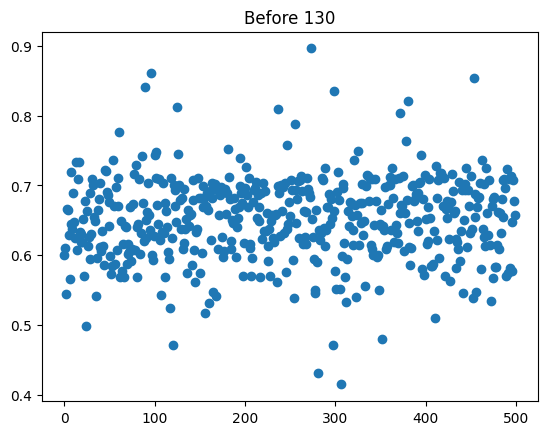

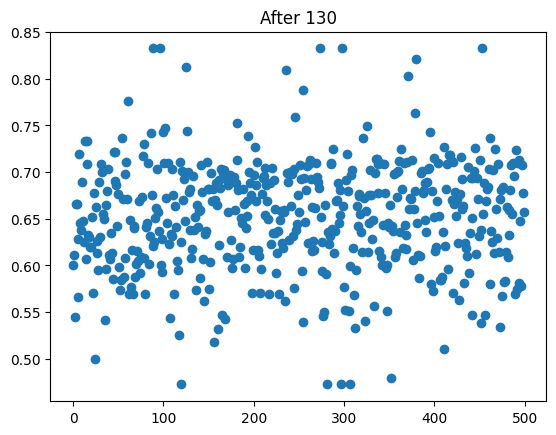

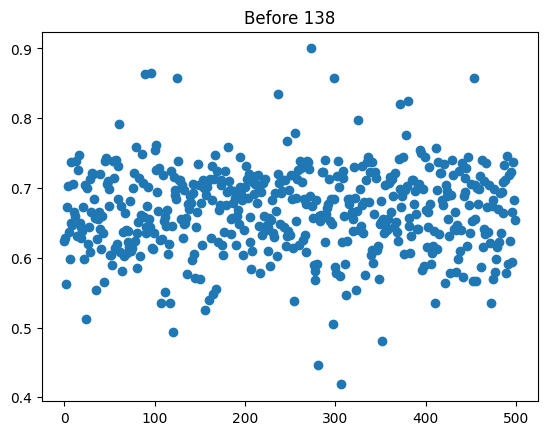

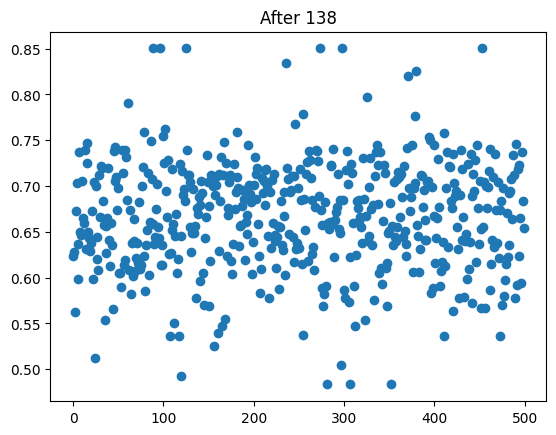

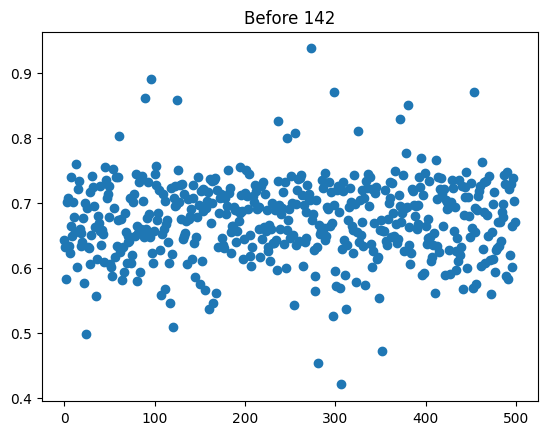

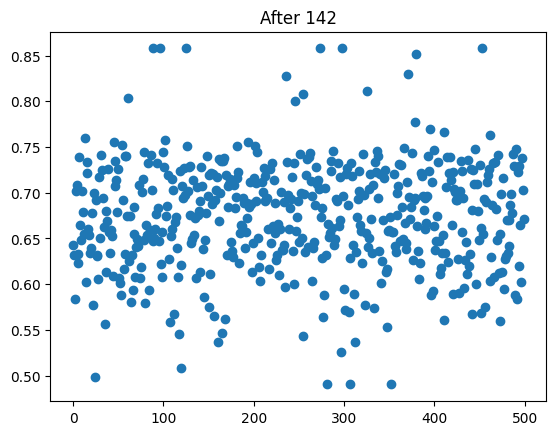

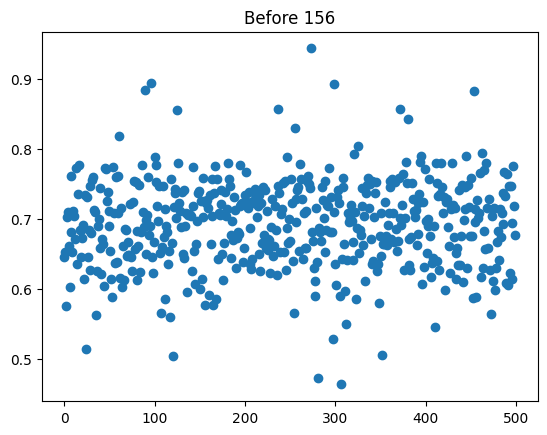

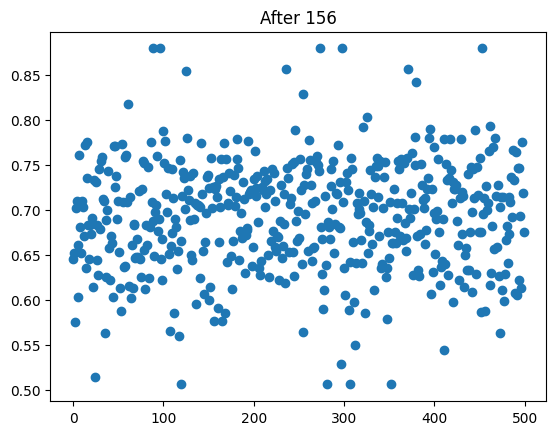

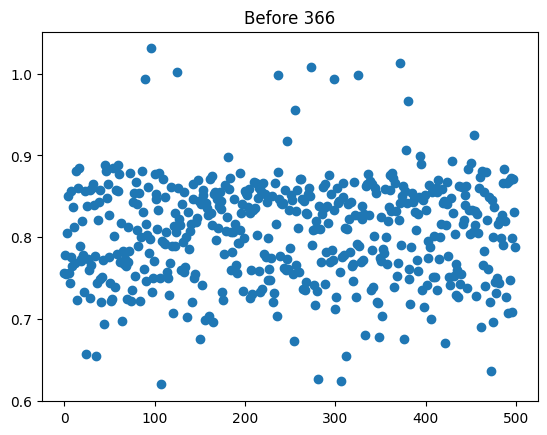

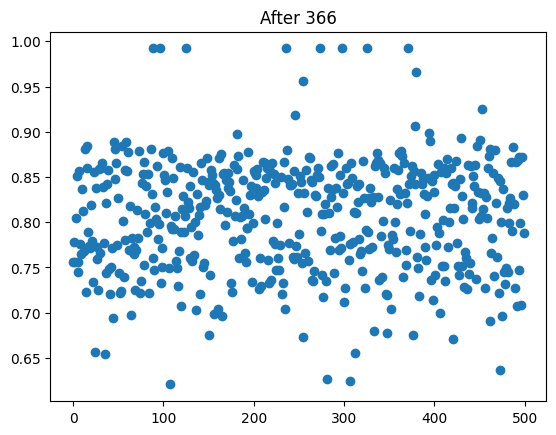

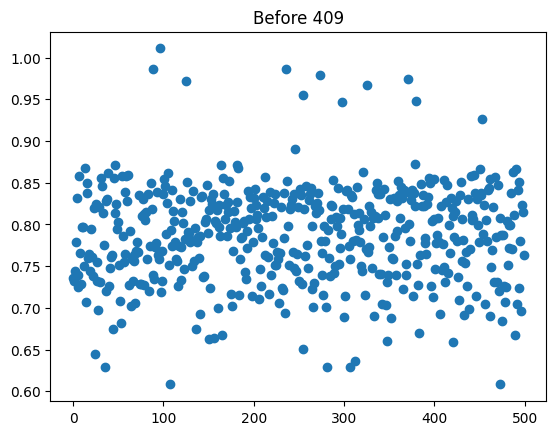

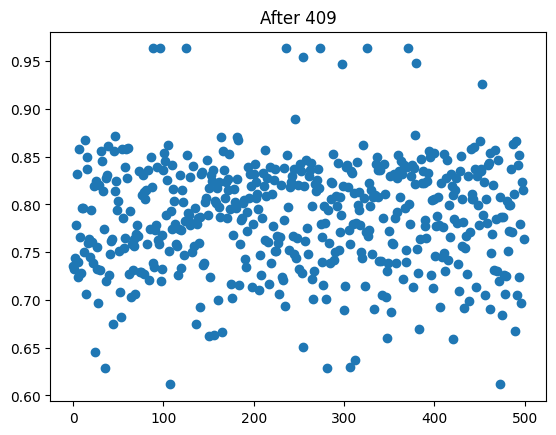

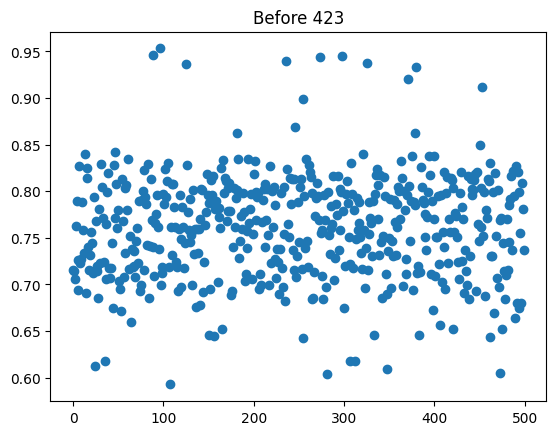

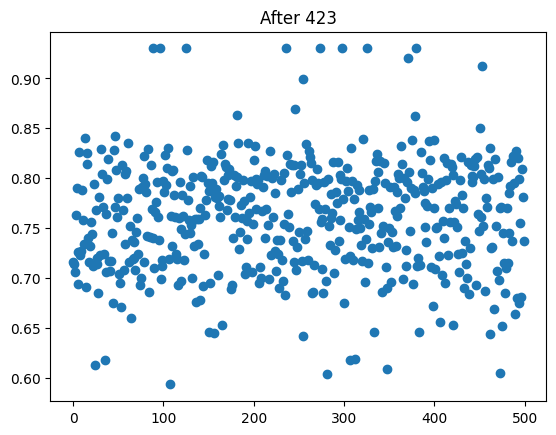

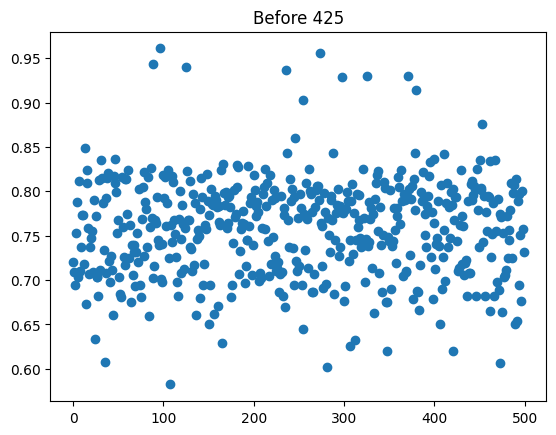

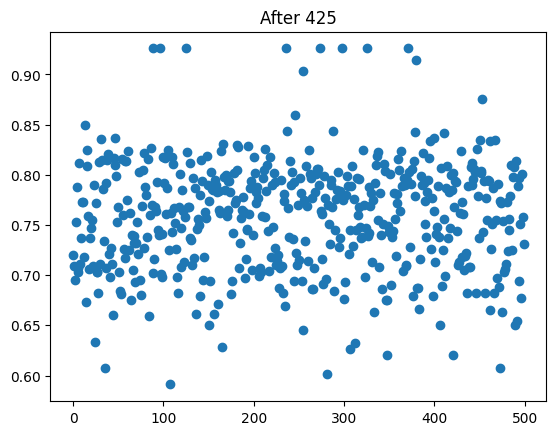

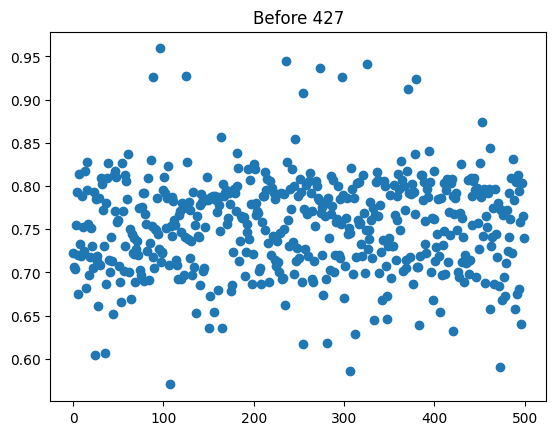

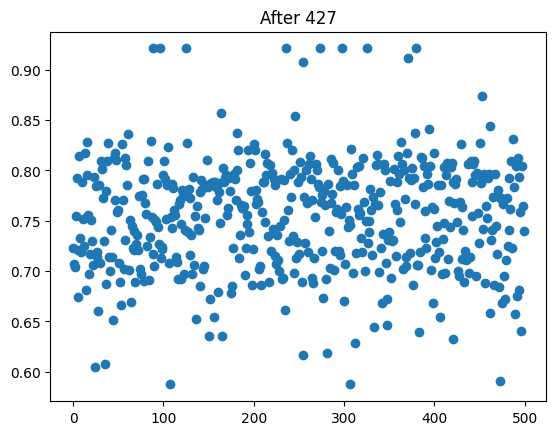

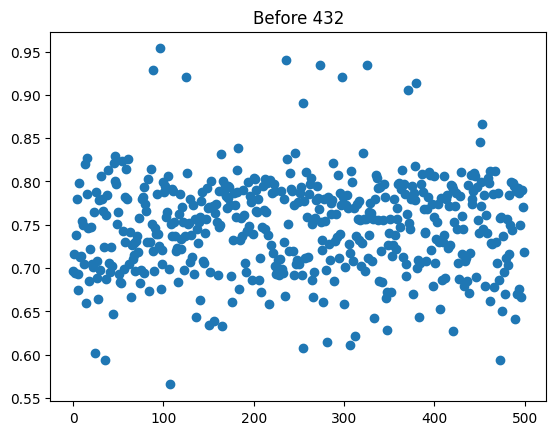

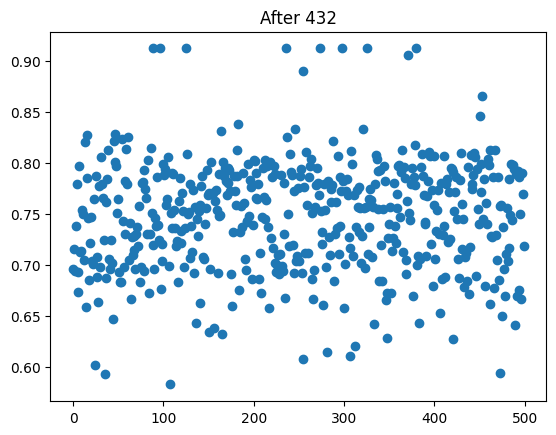

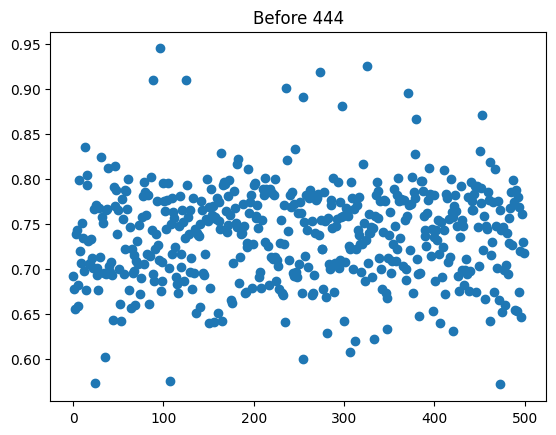

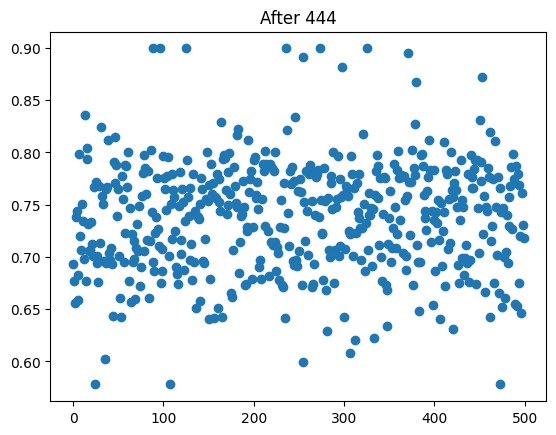

✅ Outliers clipped in these columns: ['130', '138', '142', '156', '366', '409', '423', '425', '427', '432', '444']


In [17]:
def clip_outliers(df_func, columns, threshold=8):
    # Get the columns with outliers
    outlier_cols = []
    
    for col in tqdm(columns, desc='Clipping Outliers'):
        z_score = (df_func[col] - df_func[col].mean()) / df_func[col].std()
        outliers = df_func[z_score.abs() > 3]
        
        if len(outliers) > threshold:
            outlier_cols.append(col)
    
    # Clip the outliers for only detected columns
    for col in outlier_cols:
        plt.scatter(df_func[col].index, df_func[col])
        plt.title('Before '+ col)
        plt.show()
    
        min_val = df_func[col].mean() - 3 * df_func[col].std()
        max_val = df_func[col].mean() + 3 * df_func[col].std()
        df_func[col] = df_func[col].clip(lower=min_val, upper=max_val)
    
        plt.scatter(df_func[col].index, df_func[col])
        plt.title('After '+ col)
        plt.show()
    
    print(f"✅ Outliers clipped in these columns: {outlier_cols}")
    return df_func.copy()

df = clip_outliers(df, df.iloc[:, 1:-5].columns, 8)

In [18]:
def find_optimal_clusters(data, max_clusters=10):
    wcss = []  # Within Cluster Sum of Squares
    
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid

    plt.plot(range(1, max_clusters), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method to Find Optimal K')
    plt.grid()
    plt.show()

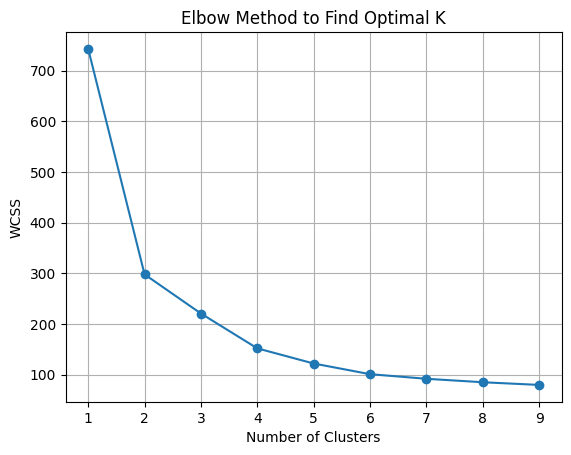

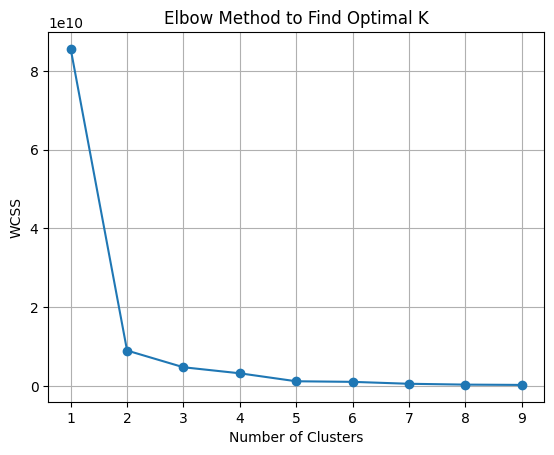

In [19]:
spectral_bands = df.columns[1:-5]  # Sensor bands

find_optimal_clusters(df[spectral_bands], max_clusters=10)
find_optimal_clusters(df[['vomitoxin_ppb']], max_clusters=10)

In [20]:
def detect_sensor_drift(df, n_clusters=3):
    spectral_bands = df.columns[1:-5]  # Assuming spectral bands are in the middle
    print(spectral_bands)
    # Fit KMeans on sensor bands
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['sensor_cluster'] = kmeans.fit_predict(df[spectral_bands])

    return df

def target_based_clustering(df, n_clusters=3):
    print(df.columns)
    # Fit KMeans only on target column (vomitoxin_ppb)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['target_cluster'] = kmeans.fit_predict(df[['vomitoxin_ppb']])

    return df

In [21]:
def plot_sensor_drift(df):
    spectral_bands = df.columns[1:-5]  # Sensor bands
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[spectral_bands].corr(), cmap='coolwarm', annot=False)
    plt.title('Sensor Drift Before KMeans Clustering')
    plt.show()

def plot_sensor_clusters(df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df.index, y='0', hue='Cluster', palette='viridis', data=df, s=60)
    plt.title('Sensor Clusters After KMeans Clustering')
    plt.show()

def plot_target_clusters(df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df.index, y='vomitoxin_ppb', hue='target_cluster', palette='plasma', data=df, s=60)
    plt.title('Target-Based Clusters on Vomitoxin')
    plt.show()

In [22]:
p = df.copy()

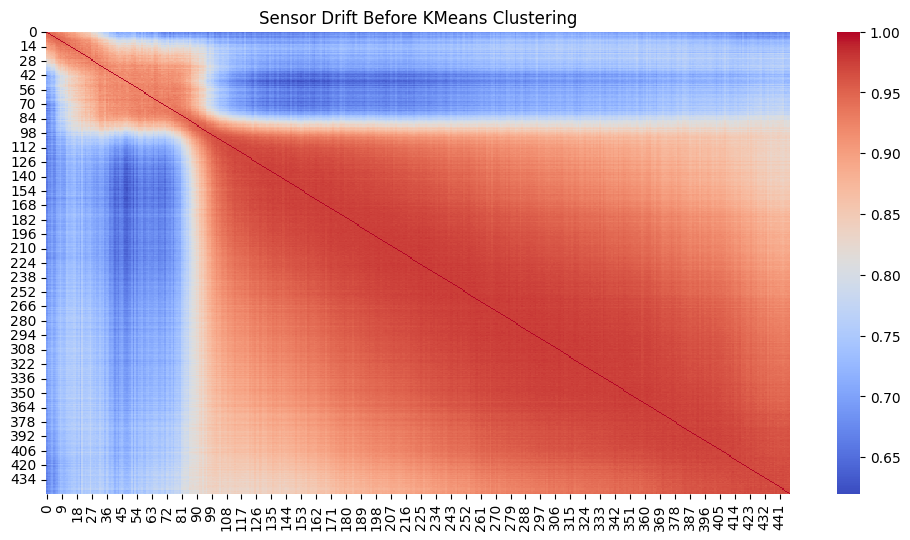

In [23]:
# Before Clustering
plot_sensor_drift(p)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '438', '439', '440', '441', '442', '443', '444', '445', '446', '447'],
      dtype='object', length=448)


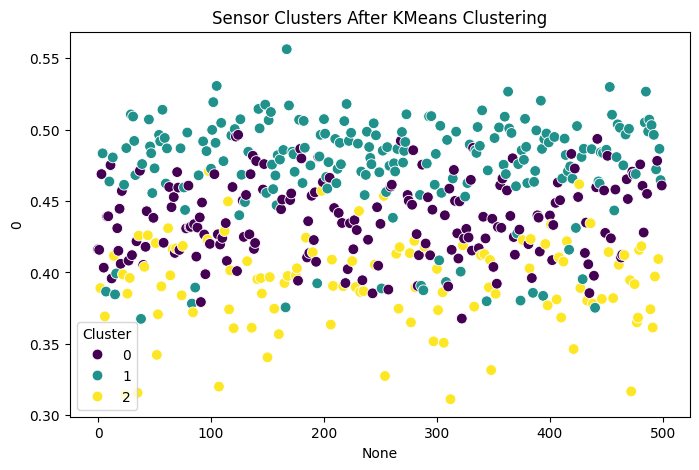

In [24]:
# Apply Sensor Drift KMeans
p = detect_sensor_drift(p)

# After Sensor Drift Clustering
plot_sensor_clusters(p)

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '444', '445', '446', '447', 'vomitoxin_ppb', 'Cluster', 'NDVI', 'NDWI',
       'SAVI', 'sensor_cluster'],
      dtype='object', length=455)


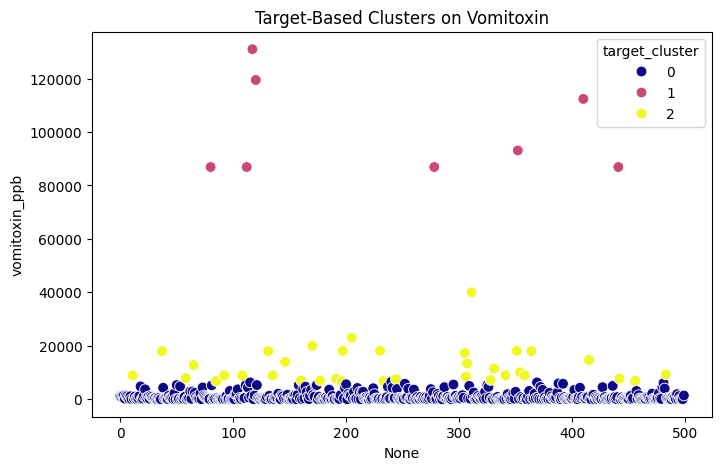

In [25]:
# Target-Based Clustering
p = target_based_clustering(p)

# Show Target Clusters
plot_target_clusters(p)

In [26]:
df = p.copy()
df

hsi_id         0         1         2         3         4  \
0      imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293   
1      imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192   
2      imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056   
3      imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672   
4      imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026   
..                ...       ...       ...       ...       ...       ...   
495  imagoai_corn_495  0.478140  0.444033  0.442120  0.437473  0.428672   
496  imagoai_corn_496  0.409367  0.394941  0.380236  0.375340  0.346122   
497  imagoai_corn_497  0.486526  0.501372  0.500175  0.508139  0.489411   
498  imagoai_corn_498  0.464595  0.498822  0.489077  0.453381  0.487636   
499  imagoai_corn_499  0.460840  0.457656  0.434632  0.412675  0.418638   

            5         6         7         8  ...       445       446  \
0    0.365390  0.355226  0.343350  0.344837  ...  0.711369  0.697679   
1    0.389634  0.375671  0.363689  0.373883  ...  0.696921  0.696544   
2    0.349709  0.333882  0.330841  0.328925  ...  0.658945  0.670989   
3    0.459824  0.458194  0.427737  0.415360  ...  0.742446  0.754657   
4    0.451152  0.458229  0.440782  0.426193  ...  0.775486  0.760431   
..        ...       ...       ...       ...  ...       ...       ...   
495  0.413238  0.417758  0.420388  0.413290  ...  0.740626  0.740116   
496  0.354650  0.361170  0.342974  0.352137  ...  0.656779  0.646700   
497  0.457311  0.462321  0.462927  0.442647  ...  0.770314  0.763324   
498  0.461950  0.461671  0.447362  0.451952  ...  0.753545  0.749619   
499  0.408338  0.403807  0.388811  0.382484  ...  0.707611  0.729484   

          447  vomitoxin_ppb  Cluster      NDVI      NDWI      SAVI  \
0    0.704520         1100.0        0  0.250630 -0.150306  0.232870   
1    0.689054         1000.0        0  0.235337 -0.142551  0.221789   
2    0.665176         1300.0        2  0.268777 -0.187438  0.235248   
3    0.733474         1300.0        0  0.273104 -0.138824  0.263657   
4    0.751988          220.0        1  0.235773 -0.155593  0.229726   
..        ...            ...      ...       ...       ...       ...   
495  0.721839         1200.0        0  0.261706 -0.158674  0.248122   
496  0.646733            0.0        2  0.244895 -0.161756  0.223661   
497  0.797187            0.0        1  0.240818 -0.171788  0.234840   
498  0.756383            0.0        1  0.261320 -0.138971  0.253317   
499  0.718706         1400.0        0  0.271342 -0.174166  0.253589   

     sensor_cluster  target_cluster  
0                 0               0  
1                 0               0  
2                 2               0  
3                 0               0  
4                 1               0  
..              ...             ...  
495               0               0  
496               2               0  
497               1               0  
498               1               0  
499               0               0  

[500 rows x 456 columns]

In [27]:
def check_sensor_drift(df):
    spectral_bands = df.columns  # Ignore 'hsi_id'
    
    drift = {}
    for band in tqdm(spectral_bands, desc='Detecting Sensor Drift'):
        z_score = (df[band] - df[band].mean()) / df[band].std()
        drift[band] = {
            'missing': df[band].isnull().sum(),
            'drift': df[band].rolling(window=50).mean().diff().mean()
        }

    return pd.DataFrame(drift).T

drift_df = check_sensor_drift(df.iloc[:, 1:-7])
drift_df

Detecting Sensor Drift:   0%|          | 0/448 [00:00<?, ?it/s]

missing     drift
0        0.0  0.000041
1        0.0  0.000034
2        0.0  0.000040
3        0.0  0.000033
4        0.0  0.000037
..       ...       ...
443      0.0  0.000019
444      0.0  0.000018
445      0.0  0.000028
446      0.0  0.000010
447      0.0  0.000017

[448 rows x 2 columns]

In [28]:
(drift_df['missing'] > 0).any()

False

In [29]:
for i in tqdm(df.iloc[:, :-6].columns, desc='Detecting is any column has 0 instead of NULL'):
    if (df[i] == 0).any():
        print(f"Column '{i}' has 0 value.")
        display(df[df[i] == 0])

Detecting is any column has 0 instead of NULL:   0%|          | 0/450 [00:00<?, ?it/s]

Column 'vomitoxin_ppb' has 0 value.


hsi_id         0         1         2         3         4  \
10    imagoai_corn_10  0.463650  0.465623  0.445566  0.411191  0.428212   
19    imagoai_corn_19  0.444575  0.432889  0.422604  0.435552  0.406021   
32    imagoai_corn_32  0.492074  0.498929  0.475720  0.486113  0.495036   
33    imagoai_corn_33  0.468166  0.460503  0.443406  0.446816  0.436160   
35    imagoai_corn_35  0.315687  0.329597  0.316564  0.321215  0.317651   
..                ...       ...       ...       ...       ...       ...   
492  imagoai_corn_492  0.496341  0.482789  0.500502  0.479896  0.479827   
494  imagoai_corn_494  0.472154  0.472796  0.459123  0.472190  0.446029   
496  imagoai_corn_496  0.409367  0.394941  0.380236  0.375340  0.346122   
497  imagoai_corn_497  0.486526  0.501372  0.500175  0.508139  0.489411   
498  imagoai_corn_498  0.464595  0.498822  0.489077  0.453381  0.487636   

            5         6         7         8  ...       445       446  \
10   0.449270  0.418872  0.423685  0.396482  ...  0.746716  0.749224   
19   0.376693  0.394095  0.397655  0.389030  ...  0.683121  0.722853   
32   0.457037  0.456458  0.426542  0.441431  ...  0.779648  0.789558   
33   0.419604  0.413528  0.403589  0.389226  ...  0.730465  0.739876   
35   0.314776  0.304154  0.290678  0.300534  ...  0.577803  0.576985   
..        ...       ...       ...       ...  ...       ...       ...   
492  0.484467  0.462175  0.463770  0.452925  ...  0.781870  0.771515   
494  0.444173  0.436180  0.452302  0.423924  ...  0.789799  0.778661   
496  0.354650  0.361170  0.342974  0.352137  ...  0.656779  0.646700   
497  0.457311  0.462321  0.462927  0.442647  ...  0.770314  0.763324   
498  0.461950  0.461671  0.447362  0.451952  ...  0.753545  0.749619   

          447  vomitoxin_ppb  Cluster      NDVI      NDWI      SAVI  \
10   0.750414            0.0        1  0.255454 -0.138392  0.248895   
19   0.690103            0.0        0  0.268921 -0.160566  0.250845   
32   0.776819            0.0        1  0.239523 -0.155346  0.234358   
33   0.747992            0.0        1  0.249097 -0.199031  0.235003   
35   0.585241            0.0        2  0.229937 -0.146226  0.203103   
..        ...            ...      ...       ...       ...       ...   
492  0.777421            0.0        1  0.263718 -0.148720  0.259306   
494  0.759398            0.0        1  0.241666 -0.142050  0.239940   
496  0.646733            0.0        2  0.244895 -0.161756  0.223661   
497  0.797187            0.0        1  0.240818 -0.171788  0.234840   
498  0.756383            0.0        1  0.261320 -0.138971  0.253317   

     sensor_cluster  target_cluster  
10                1               0  
19                0               0  
32                1               0  
33                1               0  
35                2               0  
..              ...             ...  
492               1               0  
494               1               0  
496               2               0  
497               1               0  
498               1               0  

[88 rows x 456 columns]

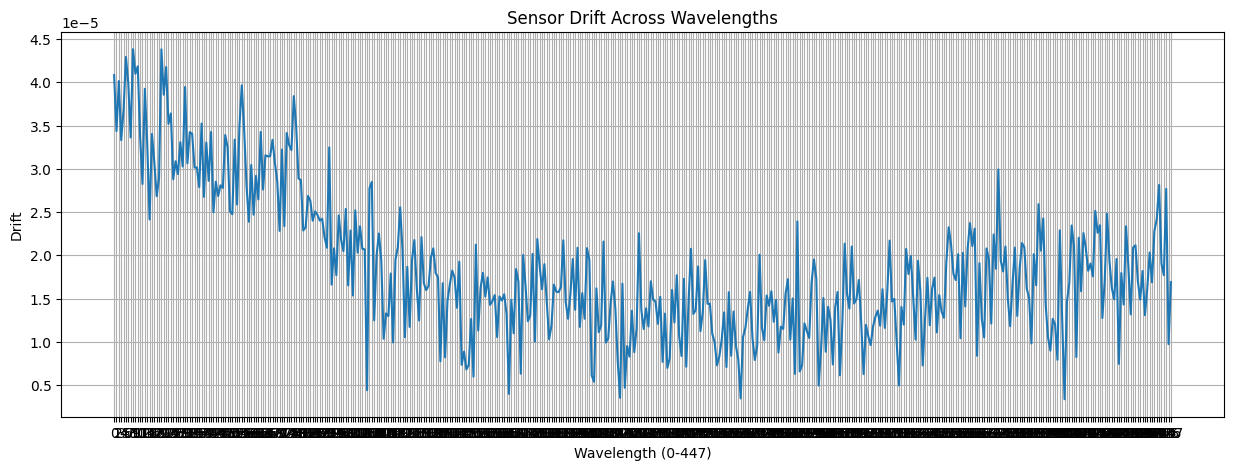

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(drift_df['drift'])
plt.title('Sensor Drift Across Wavelengths')
plt.xlabel('Wavelength (0-447)')
plt.ylabel('Drift')
plt.grid(True)
plt.show()

In [31]:
from scipy.stats import zscore

# Calculate Z-Score for NDVI
df['NDVI_Z'] = zscore(df['NDVI'])

# Detect Anomalies (NDVI < 0.2 or Z-Score > 2.5)
df['Anomaly'] = ((df['NDVI'] < 0.2) | (abs(df['NDVI_Z']) > 2.5)).astype(int)

df

hsi_id         0         1         2         3         4  \
0      imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293   
1      imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192   
2      imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056   
3      imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672   
4      imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026   
..                ...       ...       ...       ...       ...       ...   
495  imagoai_corn_495  0.478140  0.444033  0.442120  0.437473  0.428672   
496  imagoai_corn_496  0.409367  0.394941  0.380236  0.375340  0.346122   
497  imagoai_corn_497  0.486526  0.501372  0.500175  0.508139  0.489411   
498  imagoai_corn_498  0.464595  0.498822  0.489077  0.453381  0.487636   
499  imagoai_corn_499  0.460840  0.457656  0.434632  0.412675  0.418638   

            5         6         7         8  ...       447  vomitoxin_ppb  \
0    0.365390  0.355226  0.343350  0.344837  ...  0.704520         1100.0   
1    0.389634  0.375671  0.363689  0.373883  ...  0.689054         1000.0   
2    0.349709  0.333882  0.330841  0.328925  ...  0.665176         1300.0   
3    0.459824  0.458194  0.427737  0.415360  ...  0.733474         1300.0   
4    0.451152  0.458229  0.440782  0.426193  ...  0.751988          220.0   
..        ...       ...       ...       ...  ...       ...            ...   
495  0.413238  0.417758  0.420388  0.413290  ...  0.721839         1200.0   
496  0.354650  0.361170  0.342974  0.352137  ...  0.646733            0.0   
497  0.457311  0.462321  0.462927  0.442647  ...  0.797187            0.0   
498  0.461950  0.461671  0.447362  0.451952  ...  0.756383            0.0   
499  0.408338  0.403807  0.388811  0.382484  ...  0.718706         1400.0   

     Cluster      NDVI      NDWI      SAVI  sensor_cluster  target_cluster  \
0          0  0.250630 -0.150306  0.232870               0               0   
1          0  0.235337 -0.142551  0.221789               0               0   
2          2  0.268777 -0.187438  0.235248               2               0   
3          0  0.273104 -0.138824  0.263657               0               0   
4          1  0.235773 -0.155593  0.229726               1               0   
..       ...       ...       ...       ...             ...             ...   
495        0  0.261706 -0.158674  0.248122               0               0   
496        2  0.244895 -0.161756  0.223661               2               0   
497        1  0.240818 -0.171788  0.234840               1               0   
498        1  0.261320 -0.138971  0.253317               1               0   
499        0  0.271342 -0.174166  0.253589               0               0   

       NDVI_Z  Anomaly  
0   -0.167825        0  
1   -0.625760        0  
2    0.375554        0  
3    0.505111        0  
4   -0.612681        0  
..        ...      ...  
495  0.163813        0  
496 -0.339540        0  
497 -0.461632        0  
498  0.152260        0  
499  0.452350        0  

[500 rows x 458 columns]

In [32]:
df[(df['Anomaly'] == 0) & (df['vomitoxin_ppb'] > 10000)]

hsi_id         0         1         2         3         4  \
65    imagoai_corn_65  0.445674  0.430199  0.412933  0.434519  0.404757   
146  imagoai_corn_146  0.458030  0.460488  0.470342  0.439895  0.453419   
170  imagoai_corn_170  0.450694  0.464852  0.458474  0.451489  0.447340   
197  imagoai_corn_197  0.496358  0.492878  0.478654  0.492247  0.473738   
205  imagoai_corn_205  0.466291  0.476235  0.456065  0.477684  0.460214   
305  imagoai_corn_305  0.386052  0.362722  0.368605  0.367415  0.373618   
307  imagoai_corn_307  0.439983  0.432781  0.424303  0.426760  0.427906   
311  imagoai_corn_311  0.458668  0.425737  0.426963  0.415822  0.423994   
331  imagoai_corn_331  0.415284  0.379293  0.398762  0.396791  0.397698   
351  imagoai_corn_351  0.494087  0.473022  0.458527  0.477982  0.460040   
354  imagoai_corn_354  0.431784  0.437871  0.422039  0.407788  0.424040   
364  imagoai_corn_364  0.500819  0.490121  0.507978  0.487429  0.467661   
415  imagoai_corn_415  0.421830  0.415227  0.404573  0.399179  0.399793   

            5         6         7         8  ...       447  vomitoxin_ppb  \
65   0.406997  0.391734  0.391914  0.390035  ...  0.714362        12800.0   
146  0.441517  0.430877  0.414097  0.421116  ...  0.736901        14000.0   
170  0.442303  0.424081  0.440629  0.420624  ...  0.736617        20000.0   
197  0.478951  0.465243  0.456559  0.429340  ...  0.758958        18100.0   
205  0.447743  0.444092  0.445662  0.418224  ...  0.771325        23000.0   
305  0.344031  0.344526  0.349195  0.329503  ...  0.743686        17300.0   
307  0.433913  0.408467  0.407103  0.406555  ...  0.712220        13400.0   
311  0.421412  0.407219  0.419119  0.403343  ...  0.790901        40000.0   
331  0.380567  0.367184  0.386393  0.369878  ...  0.715875        11500.0   
351  0.466032  0.447664  0.453609  0.427871  ...  0.771266        18100.0   
354  0.401058  0.386459  0.386724  0.373688  ...  0.716817        10100.0   
364  0.468469  0.475314  0.454415  0.462820  ...  0.771208        18000.0   
415  0.396952  0.371043  0.357893  0.382042  ...  0.707830        14700.0   

     Cluster      NDVI      NDWI      SAVI  sensor_cluster  target_cluster  \
65         0  0.254939 -0.146078  0.238121               0               2   
146        0  0.234460 -0.159350  0.225636               0               2   
170        0  0.238550 -0.148339  0.224789               0               2   
197        1  0.263658 -0.118802  0.259764               1               2   
205        0  0.215713 -0.157241  0.205650               0               2   
305        2  0.233520 -0.154128  0.214170               2               2   
307        0  0.233045 -0.144609  0.219776               0               2   
311        0  0.208609 -0.146546  0.197259               0               2   
331        0  0.223856 -0.173809  0.209233               0               2   
351        1  0.241467 -0.122997  0.237933               1               2   
354        0  0.206692 -0.161832  0.196551               0               2   
364        1  0.219269 -0.137529  0.216603               1               2   
415        2  0.244440 -0.121552  0.231500               2               2   

       NDVI_Z  Anomaly  
65  -0.038816        0  
146 -0.651999        0  
170 -0.529554        0  
197  0.222268        0  
205 -1.213363        0  
305 -0.680148        0  
307 -0.694380        0  
311 -1.426077        0  
331 -0.969517        0  
351 -0.442204        0  
354 -1.483472        0  
364 -1.106888        0  
415 -0.353189        0  

[13 rows x 458 columns]

In [33]:
df[(df['Anomaly'] == 1) & (df['vomitoxin_ppb'] < 5000)]

hsi_id         0         1         2         3         4  \
53    imagoai_corn_53  0.370621  0.380629  0.385707  0.394416  0.369472   
87    imagoai_corn_87  0.411065  0.392886  0.386795  0.384325  0.376564   
168  imagoai_corn_168  0.397496  0.382136  0.393205  0.384590  0.388874   
239  imagoai_corn_239  0.422887  0.422717  0.420966  0.411992  0.408469   
249  imagoai_corn_249  0.470113  0.478327  0.461933  0.471689  0.459936   
259  imagoai_corn_259  0.460121  0.458523  0.417173  0.427575  0.413403   
281  imagoai_corn_281  0.389409  0.368552  0.379599  0.370555  0.357552   
323  imagoai_corn_323  0.418939  0.408284  0.400156  0.384952  0.373689   
342  imagoai_corn_342  0.412768  0.410260  0.368003  0.372989  0.344537   
417  imagoai_corn_417  0.415880  0.408844  0.421565  0.404252  0.394299   
452  imagoai_corn_452  0.414228  0.402388  0.445873  0.405377  0.393317   
453  imagoai_corn_453  0.529865  0.508880  0.525140  0.533202  0.498973   
480  imagoai_corn_480  0.475630  0.473880  0.497029  0.488678  0.457320   

            5         6         7         8  ...       447  vomitoxin_ppb  \
53   0.360610  0.371897  0.381543  0.366239  ...  0.648347         4800.0   
87   0.353822  0.355187  0.341209  0.326913  ...  0.754345            0.0   
168  0.384802  0.368659  0.373003  0.364725  ...  0.772664         1300.0   
239  0.402082  0.423013  0.400302  0.398139  ...  0.696912          300.0   
249  0.440018  0.446291  0.444527  0.424547  ...  0.776786          400.0   
259  0.413833  0.405489  0.388843  0.404845  ...  0.728466          500.0   
281  0.334395  0.333861  0.320500  0.329834  ...  0.614352         2000.0   
323  0.379407  0.384967  0.359075  0.351158  ...  0.666188         2800.0   
342  0.339842  0.349644  0.337373  0.346768  ...  0.653914          300.0   
417  0.390485  0.379643  0.363861  0.359159  ...  0.724150            0.0   
452  0.399193  0.382775  0.373718  0.386048  ...  0.789304         1300.0   
453  0.496729  0.473454  0.472909  0.439078  ...  0.872439            0.0   
480  0.462135  0.445382  0.452881  0.428192  ...  0.757213         4500.0   

     Cluster      NDVI      NDWI      SAVI  sensor_cluster  target_cluster  \
53         2  0.179649 -0.148545  0.166394               2               0   
87         0  0.362564 -0.162673  0.339970               0               0   
168        2  0.185230 -0.131739  0.172693               2               0   
239        0  0.199613 -0.141206  0.193243               0               0   
249        1  0.197146 -0.157981  0.192698               1               0   
259        0  0.352186 -0.118488  0.341713               0               0   
281        2  0.182711 -0.163703  0.155856               2               0   
323        2  0.192292 -0.130441  0.178181               2               0   
342        2  0.385225 -0.160046  0.336147               2               0   
417        1  0.409226 -0.190340  0.375090               1               0   
452        2  0.175480 -0.139785  0.164535               2               0   
453        1  0.345569 -0.115940  0.354887               1               0   
480        0  0.196216 -0.133132  0.193951               0               0   

       NDVI_Z  Anomaly  
53  -2.293230        1  
87   3.183858        1  
168 -2.126109        1  
239 -1.695456        1  
249 -1.769304        1  
259  2.873106        1  
281 -2.201536        1  
323 -1.914663        1  
342  3.862388        1  
417  4.581043        1  
452 -2.418052        1  
453  2.674951        1  
480 -1.797164        1  

[13 rows x 458 columns]

In [34]:
df['Anomaly'].value_counts()

0    476
1     24
Name: Anomaly, dtype: int64

In [35]:
df_group_anomaly = df.groupby('Anomaly').mean()
df_group_anomaly

C:\Users\Asus\AppData\Local\Temp\ipykernel_23392\1003001491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_anomaly = df.groupby('Anomaly').mean()


0         1         2         3         4         5         6  \
Anomaly                                                                         
0        0.443786  0.441411  0.434389  0.426546  0.419825  0.412989  0.406482   
1        0.429876  0.427861  0.422409  0.417720  0.402432  0.401384  0.393691   

                7         8         9  ...       446       447  vomitoxin_ppb  \
Anomaly                                ...                                      
0        0.400331  0.394631  0.389895  ...  0.737775  0.738156    1741.813025   
1        0.389591  0.382276  0.385082  ...  0.734101  0.736975   36495.833333   

          Cluster      NDVI      NDWI      SAVI  sensor_cluster  \
Anomaly                                                           
0        0.852941  0.258203 -0.153773  0.245804        0.857143   
1        1.083333  0.217195 -0.151396  0.203917        1.083333   

         target_cluster    NDVI_Z  
Anomaly                            
0              0.138655  0.058941  
1              0.583333 -1.168993  

[2 rows x 456 columns]

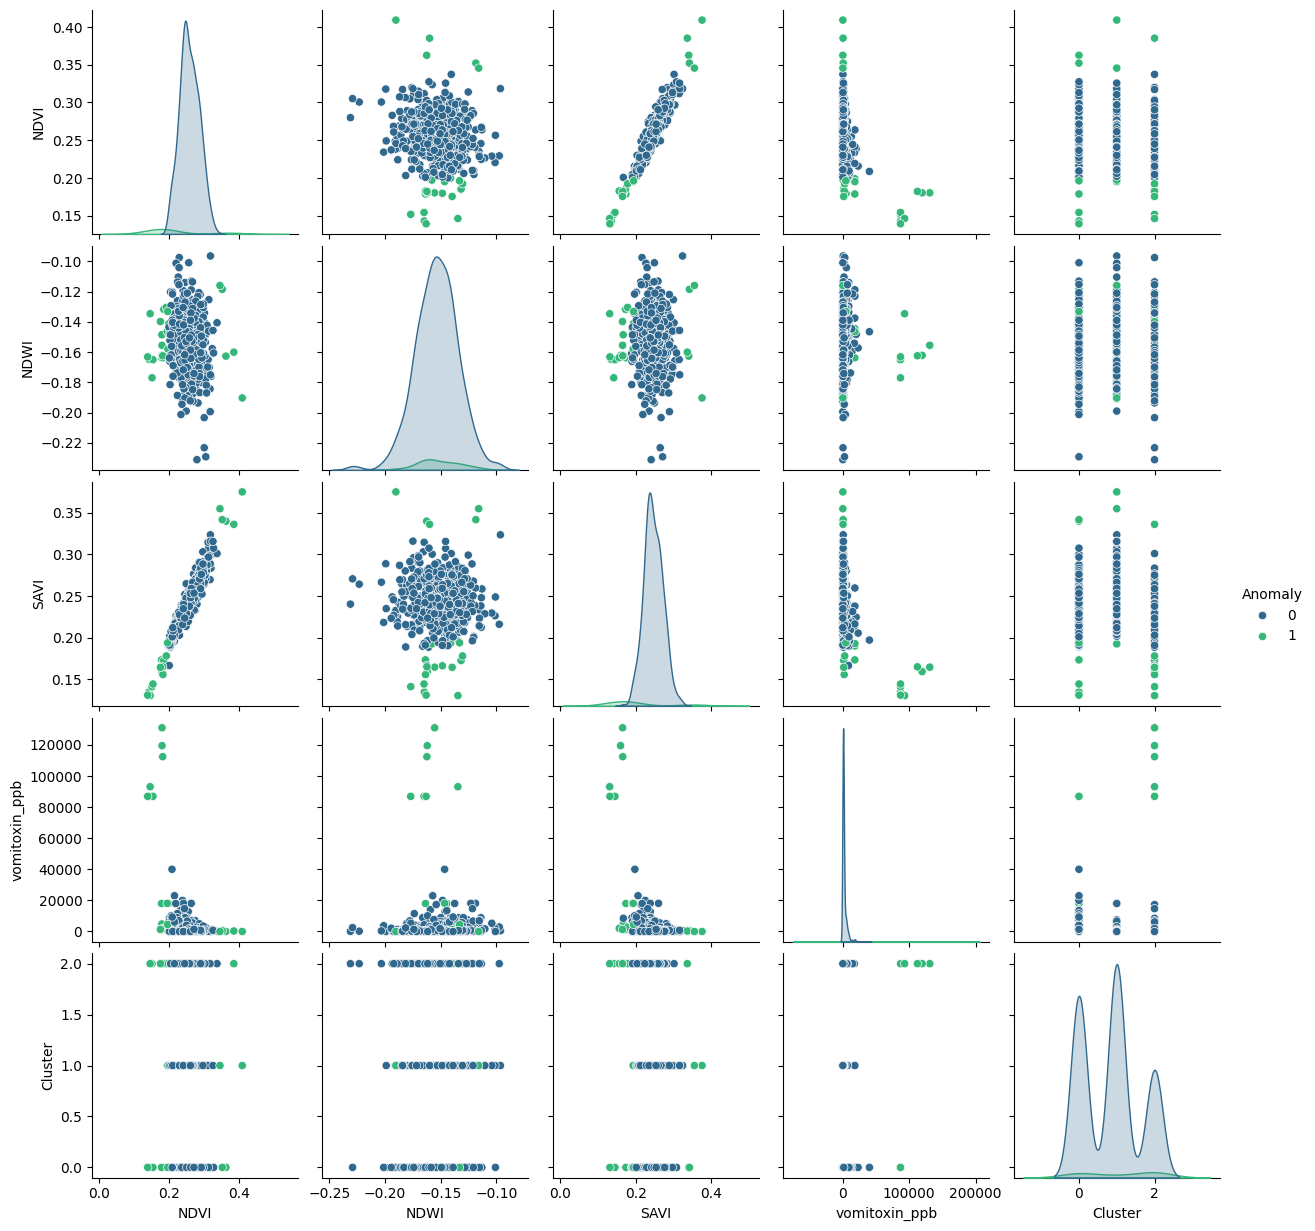

In [36]:
sns.pairplot(df[['NDVI', 'NDWI', 'SAVI', 'vomitoxin_ppb', 'Cluster', 'Anomaly']], hue='Anomaly', palette='viridis')

In [37]:
# def spectral_pipeline(df):
#     # Sensor Drift
#     drift_df = check_sensor_drift(df)
    
#     # Add Spectral Indices
#     red_band = '40'  # Example red band
#     nir_band = '100'  # Example NIR band
#     swir_band = '200' # Example SWIR band

#     # NDVI
#     df['NDVI'] = (df[nir_band] - df[red_band]) / (df[nir_band] + df[red_band])

#     # NDWI
#     df['NDWI'] = (df[nir_band] - df[swir_band]) / (df[nir_band] + df[swir_band])

#     # SAVI
#     L = 0.5
#     df['SAVI'] = (df[nir_band] - df[red_band]) / (df[nir_band] + df[red_band] + L) * (1 + L)

#     return df, drift_df

# # Run Pipeline
# processed_df, drift_results = spectral_pipeline(df)

In [38]:
z = df.copy()

In [39]:
z.drop(['Cluster', 'NDVI_Z'], axis = 1, inplace = True)

In [40]:
target = z['vomitoxin_ppb']
features = z.drop('vomitoxin_ppb', axis = 1)

In [41]:
final_df = pd.concat([features, target], axis = 1)
final_df

hsi_id         0         1         2         3         4  \
0      imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293   
1      imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192   
2      imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056   
3      imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672   
4      imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026   
..                ...       ...       ...       ...       ...       ...   
495  imagoai_corn_495  0.478140  0.444033  0.442120  0.437473  0.428672   
496  imagoai_corn_496  0.409367  0.394941  0.380236  0.375340  0.346122   
497  imagoai_corn_497  0.486526  0.501372  0.500175  0.508139  0.489411   
498  imagoai_corn_498  0.464595  0.498822  0.489077  0.453381  0.487636   
499  imagoai_corn_499  0.460840  0.457656  0.434632  0.412675  0.418638   

            5         6         7         8  ...       445       446  \
0    0.365390  0.355226  0.343350  0.344837  ...  0.711369  0.697679   
1    0.389634  0.375671  0.363689  0.373883  ...  0.696921  0.696544   
2    0.349709  0.333882  0.330841  0.328925  ...  0.658945  0.670989   
3    0.459824  0.458194  0.427737  0.415360  ...  0.742446  0.754657   
4    0.451152  0.458229  0.440782  0.426193  ...  0.775486  0.760431   
..        ...       ...       ...       ...  ...       ...       ...   
495  0.413238  0.417758  0.420388  0.413290  ...  0.740626  0.740116   
496  0.354650  0.361170  0.342974  0.352137  ...  0.656779  0.646700   
497  0.457311  0.462321  0.462927  0.442647  ...  0.770314  0.763324   
498  0.461950  0.461671  0.447362  0.451952  ...  0.753545  0.749619   
499  0.408338  0.403807  0.388811  0.382484  ...  0.707611  0.729484   

          447      NDVI      NDWI      SAVI  sensor_cluster  target_cluster  \
0    0.704520  0.250630 -0.150306  0.232870               0               0   
1    0.689054  0.235337 -0.142551  0.221789               0               0   
2    0.665176  0.268777 -0.187438  0.235248               2               0   
3    0.733474  0.273104 -0.138824  0.263657               0               0   
4    0.751988  0.235773 -0.155593  0.229726               1               0   
..        ...       ...       ...       ...             ...             ...   
495  0.721839  0.261706 -0.158674  0.248122               0               0   
496  0.646733  0.244895 -0.161756  0.223661               2               0   
497  0.797187  0.240818 -0.171788  0.234840               1               0   
498  0.756383  0.261320 -0.138971  0.253317               1               0   
499  0.718706  0.271342 -0.174166  0.253589               0               0   

     Anomaly  vomitoxin_ppb  
0          0         1100.0  
1          0         1000.0  
2          0         1300.0  
3          0         1300.0  
4          0          220.0  
..       ...            ...  
495        0         1200.0  
496        0            0.0  
497        0            0.0  
498        0            0.0  
499        0         1400.0  

[500 rows x 456 columns]

In [42]:
from sklearn.model_selection import train_test_split

# Step 1: Manually select 2 rows for the test set
test = final_df.sample(n=2, random_state=42)  # Random 2 rows for test set

# Step 2: Remaining data for train and val
train_val = final_df.drop(test.index)

# Step 3: Split train (80%) and val (20%) from the remaining data
train, val = train_test_split(train_val, test_size=0.2, shuffle = True, random_state=42)

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

# Step 4: Add mode column to each
train['mode'] = 'Train'
val['mode'] = 'Val'
test['mode'] = 'Test'

# Print the sets
print("Train set:\n")
display(train)
print("\nValidation set:\n")
display(val)
print("\nTest set:\n")
display(test)

Train set:



hsi_id         0         1         2         3         4  \
0     imagoai_corn_56  0.390224  0.377451  0.378702  0.357795  0.347033   
1    imagoai_corn_228  0.389682  0.393125  0.396747  0.380133  0.379760   
2    imagoai_corn_281  0.389409  0.368552  0.379599  0.370555  0.357552   
3    imagoai_corn_487  0.498679  0.500315  0.475278  0.463834  0.462428   
4    imagoai_corn_221  0.402263  0.406747  0.392448  0.388474  0.374650   
..                ...       ...       ...       ...       ...       ...   
393  imagoai_corn_107  0.320042  0.324240  0.313938  0.313432  0.310200   
394  imagoai_corn_271  0.485075  0.502901  0.491907  0.452030  0.488410   
395  imagoai_corn_349  0.437572  0.424074  0.414991  0.403447  0.406791   
396  imagoai_corn_437  0.486299  0.475453  0.492001  0.473090  0.480077   
397  imagoai_corn_103  0.468762  0.483937  0.475859  0.472765  0.448592   

            5         6         7         8  ...       446       447  \
0    0.359653  0.334607  0.344981  0.338628  ...  0.678671  0.699897   
1    0.359823  0.346882  0.328305  0.306250  ...  0.681607  0.683517   
2    0.334395  0.333861  0.320500  0.329834  ...  0.618063  0.614352   
3    0.467863  0.470833  0.474026  0.454858  ...  0.776269  0.821206   
4    0.355662  0.375828  0.363383  0.381151  ...  0.715929  0.717686   
..        ...       ...       ...       ...  ...       ...       ...   
393  0.339276  0.305903  0.305356  0.293930  ...  0.585291  0.562302   
394  0.454392  0.475717  0.432744  0.420535  ...  0.780888  0.772853   
395  0.391296  0.377997  0.373266  0.381196  ...  0.727520  0.708022   
396  0.452880  0.435828  0.455416  0.438950  ...  0.783426  0.782098   
397  0.454086  0.429283  0.415336  0.413464  ...  0.738216  0.746354   

         NDVI      NDWI      SAVI  sensor_cluster  target_cluster  Anomaly  \
0    0.263805 -0.170783  0.240239               2               0        0   
1    0.279917 -0.231197  0.240378               2               0        0   
2    0.182711 -0.163703  0.155856               2               0        1   
3    0.210806 -0.140337  0.212129               1               0        0   
4    0.265418 -0.155615  0.251485               0               0        0   
..        ...       ...       ...             ...             ...      ...   
393  0.248674 -0.180246  0.213697               2               0        0   
394  0.265515 -0.158024  0.257643               1               0        0   
395  0.270659 -0.141903  0.255794               0               0        0   
396  0.257620 -0.146512  0.253642               1               0        0   
397  0.249774 -0.137209  0.242640               0               0        0   

     vomitoxin_ppb   mode  
0            200.0  Train  
1            100.0  Train  
2           2000.0  Train  
3              0.0  Train  
4            600.0  Train  
..             ...    ...  
393          100.0  Train  
394          810.0  Train  
395          200.0  Train  
396          480.0  Train  
397         2100.0  Train  

[398 rows x 457 columns]


Validation set:



hsi_id         0         1         2         3         4  \
0   imagoai_corn_489  0.374177  0.376092  0.370786  0.370811  0.349956   
1    imagoai_corn_74  0.383939  0.399848  0.378190  0.380053  0.360482   
2   imagoai_corn_232  0.386281  0.403065  0.388841  0.375524  0.379542   
3   imagoai_corn_176  0.402874  0.403305  0.385253  0.393690  0.397845   
4   imagoai_corn_238  0.498536  0.486919  0.482077  0.466319  0.459229   
..               ...       ...       ...       ...       ...       ...   
95  imagoai_corn_248  0.404708  0.396738  0.399595  0.385149  0.386352   
96  imagoai_corn_385  0.385710  0.404904  0.345857  0.374159  0.363479   
97   imagoai_corn_19  0.444575  0.432889  0.422604  0.435552  0.406021   
98  imagoai_corn_322  0.367682  0.377550  0.373705  0.387572  0.349443   
99  imagoai_corn_332  0.487195  0.505922  0.486143  0.467251  0.486389   

           5         6         7         8  ...       446       447      NDVI  \
0   0.341680  0.334262  0.330851  0.299022  ...  0.654491  0.658983  0.290327   
1   0.363916  0.357020  0.365017  0.355517  ...  0.677846  0.679484  0.252772   
2   0.384054  0.355302  0.364912  0.357329  ...  0.672999  0.683747  0.262224   
3   0.377312  0.382213  0.348654  0.346361  ...  0.679948  0.660812  0.203648   
4   0.446208  0.444045  0.417391  0.437810  ...  0.756590  0.748254  0.229895   
..       ...       ...       ...       ...  ...       ...       ...       ...   
95  0.366895  0.383574  0.363799  0.365087  ...  0.709903  0.695476  0.270552   
96  0.349988  0.354865  0.340398  0.369850  ...  0.785109  0.796771  0.264653   
97  0.376693  0.394095  0.397655  0.389030  ...  0.722853  0.690103  0.268921   
98  0.359306  0.351335  0.357012  0.321357  ...  0.733357  0.736416  0.307429   
99  0.448237  0.462092  0.443896  0.431145  ...  0.760312  0.769591  0.249566   

        NDWI      SAVI  sensor_cluster  target_cluster  Anomaly  \
0  -0.160403  0.258893               2               0        0   
1  -0.136791  0.235272               2               0        0   
2  -0.162144  0.242101               2               0        0   
3  -0.160993  0.188676               2               0        0   
4  -0.165068  0.222754               1               0        0   
..       ...       ...             ...             ...      ...   
95 -0.146004  0.256336               0               0        0   
96 -0.181181  0.255573               1               0        0   
97 -0.160566  0.250845               0               0        0   
98 -0.187033  0.286942               0               0        0   
99 -0.153729  0.239145               0               0        0   

    vomitoxin_ppb  mode  
0           800.0   Val  
1          1400.0   Val  
2           200.0   Val  
3          1000.0   Val  
4           260.0   Val  
..            ...   ...  
95            0.0   Val  
96          300.0   Val  
97            0.0   Val  
98          100.0   Val  
99          570.0   Val  

[100 rows x 457 columns]


Test set:



hsi_id         0         1         2         3         4  \
0  imagoai_corn_361  0.468848  0.458093  0.452806  0.445681  0.442604   
1   imagoai_corn_73  0.486894  0.500834  0.476579  0.482990  0.464815   

          5         6         7         8  ...       446       447      NDVI  \
0  0.453349  0.462636  0.422690  0.443466  ...  0.789878  0.790295  0.255409   
1  0.453205  0.444316  0.452601  0.432970  ...  0.754569  0.777918  0.223936   

       NDWI      SAVI  sensor_cluster  target_cluster  Anomaly  vomitoxin_ppb  \
0 -0.170769  0.247601               1               0        0         1200.0   
1 -0.155692  0.219074               1               0        0         4400.0   

   mode  
0  Test  
1  Test  

[2 rows x 457 columns]

In [43]:
# Step 5: Concatenate all into a single DataFrame
complete_df = pd.concat([train, val, test], axis=0).reset_index(drop=True)
complete_df

hsi_id         0         1         2         3         4  \
0     imagoai_corn_56  0.390224  0.377451  0.378702  0.357795  0.347033   
1    imagoai_corn_228  0.389682  0.393125  0.396747  0.380133  0.379760   
2    imagoai_corn_281  0.389409  0.368552  0.379599  0.370555  0.357552   
3    imagoai_corn_487  0.498679  0.500315  0.475278  0.463834  0.462428   
4    imagoai_corn_221  0.402263  0.406747  0.392448  0.388474  0.374650   
..                ...       ...       ...       ...       ...       ...   
495   imagoai_corn_19  0.444575  0.432889  0.422604  0.435552  0.406021   
496  imagoai_corn_322  0.367682  0.377550  0.373705  0.387572  0.349443   
497  imagoai_corn_332  0.487195  0.505922  0.486143  0.467251  0.486389   
498  imagoai_corn_361  0.468848  0.458093  0.452806  0.445681  0.442604   
499   imagoai_corn_73  0.486894  0.500834  0.476579  0.482990  0.464815   

            5         6         7         8  ...       446       447  \
0    0.359653  0.334607  0.344981  0.338628  ...  0.678671  0.699897   
1    0.359823  0.346882  0.328305  0.306250  ...  0.681607  0.683517   
2    0.334395  0.333861  0.320500  0.329834  ...  0.618063  0.614352   
3    0.467863  0.470833  0.474026  0.454858  ...  0.776269  0.821206   
4    0.355662  0.375828  0.363383  0.381151  ...  0.715929  0.717686   
..        ...       ...       ...       ...  ...       ...       ...   
495  0.376693  0.394095  0.397655  0.389030  ...  0.722853  0.690103   
496  0.359306  0.351335  0.357012  0.321357  ...  0.733357  0.736416   
497  0.448237  0.462092  0.443896  0.431145  ...  0.760312  0.769591   
498  0.453349  0.462636  0.422690  0.443466  ...  0.789878  0.790295   
499  0.453205  0.444316  0.452601  0.432970  ...  0.754569  0.777918   

         NDVI      NDWI      SAVI  sensor_cluster  target_cluster  Anomaly  \
0    0.263805 -0.170783  0.240239               2               0        0   
1    0.279917 -0.231197  0.240378               2               0        0   
2    0.182711 -0.163703  0.155856               2               0        1   
3    0.210806 -0.140337  0.212129               1               0        0   
4    0.265418 -0.155615  0.251485               0               0        0   
..        ...       ...       ...             ...             ...      ...   
495  0.268921 -0.160566  0.250845               0               0        0   
496  0.307429 -0.187033  0.286942               0               0        0   
497  0.249566 -0.153729  0.239145               0               0        0   
498  0.255409 -0.170769  0.247601               1               0        0   
499  0.223936 -0.155692  0.219074               1               0        0   

     vomitoxin_ppb   mode  
0            200.0  Train  
1            100.0  Train  
2           2000.0  Train  
3              0.0  Train  
4            600.0  Train  
..             ...    ...  
495            0.0    Val  
496          100.0    Val  
497          570.0    Val  
498         1200.0   Test  
499         4400.0   Test  

[500 rows x 457 columns]

In [44]:
# Save final scaled DataFrame as CSV
complete_df.to_csv('complete_df.csv', index=False)

In [45]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns (excluding target column)
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('vomitoxin_ppb')

# Initialize the scaler
scaler = StandardScaler()

# ===== Scale Train Data =====
scaled_train = scaler.fit_transform(train[numerical_cols])
scaled_train_df = pd.DataFrame(scaled_train, columns=numerical_cols)
train_df_scaled = pd.concat([train[['hsi_id', 'sensor_cluster', 'target_cluster', 'Anomaly']].reset_index(drop=True), 
                            scaled_train_df], axis=1)
train_df_scaled['vomitoxin_ppb'] = train['vomitoxin_ppb'].values
train_df_scaled['mode'] = 'Train'

# ===== Scale Validation Data =====
scaled_val = scaler.transform(val[numerical_cols])
scaled_val_df = pd.DataFrame(scaled_val, columns=numerical_cols)
val_df_scaled = pd.concat([val[['hsi_id', 'sensor_cluster', 'target_cluster', 'Anomaly', ]].reset_index(drop=True), 
                          scaled_val_df], axis=1)
val_df_scaled['vomitoxin_ppb'] = val['vomitoxin_ppb'].values
val_df_scaled['mode'] = 'Val'

# ===== Scale Test Data =====
scaled_test = scaler.transform(test[numerical_cols])
scaled_test_df = pd.DataFrame(scaled_test, columns=numerical_cols)
test_df_scaled = pd.concat([test[['hsi_id', 'sensor_cluster', 'target_cluster', 'Anomaly', ]].reset_index(drop=True), 
                           scaled_test_df], axis=1)
test_df_scaled['vomitoxin_ppb'] = test['vomitoxin_ppb'].values
test_df_scaled['mode'] = 'Test'

In [46]:
# ===== Combine all into one single DataFrame =====
final_scaled_df = pd.concat([train_df_scaled, val_df_scaled, test_df_scaled], axis=0).reset_index(drop=True)
final_scaled_df

hsi_id  sensor_cluster  target_cluster  Anomaly         0  \
0     imagoai_corn_56               2               0        0 -1.190358   
1    imagoai_corn_228               2               0        0 -1.202511   
2    imagoai_corn_281               2               0        1 -1.208646   
3    imagoai_corn_487               1               0        0  1.243694   
4    imagoai_corn_221               0               0        0 -0.920165   
..                ...             ...             ...      ...       ...   
495   imagoai_corn_19               0               0        0  0.029445   
496  imagoai_corn_322               0               0        0 -1.696274   
497  imagoai_corn_332               0               0        0  0.985949   
498  imagoai_corn_361               1               0        0  0.574206   
499   imagoai_corn_73               1               0        0  0.979209   

            1         2         3         4         5  ...       443  \
0   -1.367662 -1.204971 -1.473941 -1.592627 -1.184415  ... -0.994794   
1   -1.029215 -0.812916 -0.992645 -0.871829 -1.180642  ... -1.434193   
2   -1.559844 -1.185491 -1.199011 -1.360952 -1.746897  ... -2.007010   
3    1.285404  0.893305  0.810746  0.948920  1.225332  ...  1.098869   
4   -0.735059 -0.906320 -0.812941 -0.984378 -1.273293  ... -0.328572   
..        ...       ...       ...       ...       ...  ...       ...   
495 -0.170559 -0.251137  0.201404 -0.293443 -0.804959  ... -1.099808   
496 -1.365537 -1.313557 -0.832367 -1.539568 -1.192147  ... -0.096012   
497  1.406483  1.129377  0.884364  1.476663  0.788269  ...  0.515978   
498  0.373679  0.405054  0.419636  0.512298  0.902117  ...  0.755109   
499  1.296610  0.921575  1.223479  1.001495  0.898915  ...  0.829630   

          444       445       446       447      NDVI      NDWI      SAVI  \
0   -0.814301 -0.808859 -1.068500 -0.686713  0.255041 -0.907355 -0.093526   
1   -1.133386 -1.159954 -1.015031 -0.986322  0.750090 -4.084140 -0.088937   
2   -2.055077 -2.056347 -2.172351 -2.251401 -2.236660 -0.535062 -2.884617   
3    1.147499  1.127894  0.709068  1.532140 -1.373434  0.693641 -1.023318   
4   -0.502624 -0.326697 -0.389917 -0.361344  0.304585 -0.109763  0.278426   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.588580 -1.009967 -0.263803 -0.865861  0.412235 -0.370078  0.257272   
496  0.242106 -0.201217 -0.072504 -0.018750  1.595437 -1.761834  1.451216   
497  0.145278  0.277233  0.418433  0.588040 -0.182471 -0.010574 -0.129715   
498  0.709354  0.649048  0.956929  0.966749 -0.002955 -0.906601  0.149967   
499  0.203321  0.722419  0.313843  0.740355 -0.969999 -0.113782 -0.793591   

     vomitoxin_ppb   mode  
0            200.0  Train  
1            100.0  Train  
2           2000.0  Train  
3              0.0  Train  
4            600.0  Train  
..             ...    ...  
495            0.0    Val  
496          100.0    Val  
497          570.0    Val  
498         1200.0   Test  
499         4400.0   Test  

[500 rows x 457 columns]

In [47]:
# Save final scaled DataFrame as CSV
final_scaled_df.to_csv('final_scaled_df.csv', index=False)

### ML Approach

In [48]:
feature_df = pd.read_csv('final_scaled_df.csv')
# feature_df = pd.read_csv('complete_df.csv')
feature_df

hsi_id  sensor_cluster  target_cluster  Anomaly         0  \
0     imagoai_corn_56               2               0        0 -1.190358   
1    imagoai_corn_228               2               0        0 -1.202511   
2    imagoai_corn_281               2               0        1 -1.208646   
3    imagoai_corn_487               1               0        0  1.243694   
4    imagoai_corn_221               0               0        0 -0.920165   
..                ...             ...             ...      ...       ...   
495   imagoai_corn_19               0               0        0  0.029445   
496  imagoai_corn_322               0               0        0 -1.696274   
497  imagoai_corn_332               0               0        0  0.985949   
498  imagoai_corn_361               1               0        0  0.574206   
499   imagoai_corn_73               1               0        0  0.979209   

            1         2         3         4         5  ...       443  \
0   -1.367662 -1.204971 -1.473941 -1.592627 -1.184415  ... -0.994794   
1   -1.029215 -0.812916 -0.992645 -0.871829 -1.180642  ... -1.434193   
2   -1.559844 -1.185491 -1.199011 -1.360952 -1.746897  ... -2.007010   
3    1.285404  0.893305  0.810746  0.948920  1.225332  ...  1.098869   
4   -0.735059 -0.906320 -0.812941 -0.984378 -1.273293  ... -0.328572   
..        ...       ...       ...       ...       ...  ...       ...   
495 -0.170559 -0.251137  0.201404 -0.293443 -0.804959  ... -1.099808   
496 -1.365537 -1.313557 -0.832367 -1.539568 -1.192147  ... -0.096012   
497  1.406483  1.129377  0.884364  1.476663  0.788269  ...  0.515978   
498  0.373679  0.405054  0.419636  0.512298  0.902117  ...  0.755109   
499  1.296610  0.921575  1.223479  1.001495  0.898915  ...  0.829630   

          444       445       446       447      NDVI      NDWI      SAVI  \
0   -0.814301 -0.808859 -1.068500 -0.686713  0.255041 -0.907355 -0.093526   
1   -1.133386 -1.159954 -1.015031 -0.986322  0.750090 -4.084140 -0.088937   
2   -2.055077 -2.056347 -2.172351 -2.251401 -2.236660 -0.535062 -2.884617   
3    1.147499  1.127894  0.709068  1.532140 -1.373434  0.693641 -1.023318   
4   -0.502624 -0.326697 -0.389917 -0.361344  0.304585 -0.109763  0.278426   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.588580 -1.009967 -0.263803 -0.865861  0.412235 -0.370078  0.257272   
496  0.242106 -0.201217 -0.072504 -0.018750  1.595437 -1.761834  1.451216   
497  0.145278  0.277233  0.418433  0.588040 -0.182471 -0.010574 -0.129715   
498  0.709354  0.649048  0.956929  0.966749 -0.002955 -0.906601  0.149967   
499  0.203321  0.722419  0.313843  0.740355 -0.969999 -0.113782 -0.793591   

     vomitoxin_ppb   mode  
0            200.0  Train  
1            100.0  Train  
2           2000.0  Train  
3              0.0  Train  
4            600.0  Train  
..             ...    ...  
495            0.0    Val  
496          100.0    Val  
497          570.0    Val  
498         1200.0   Test  
499         4400.0   Test  

[500 rows x 457 columns]

In [104]:
f = feature_df.iloc[:, 1:-2]
t = feature_df['vomitoxin_ppb']

# # Extract Bands and Target
bands = f.copy()
bands.drop(['target_cluster'], axis = 1, inplace = True)
target = t.copy()

In [105]:
import itertools

# Columns to remove
# remove_cols = ['NDVI', 'NDWI', 'SAVI']
remove_cols = ['sensor_cluster', 'Anomaly', 'NDVI', 'NDWI', 'SAVI']

# Generate all possible combinations
combinations = []
for r in tqdm(range(1, len(remove_cols) + 1), desc='Creating combinations of Feature Engineered Columns'):
    combos = list(itertools.combinations(remove_cols, r))
    combinations.extend(combos)

Creating combinations of Feature Engineered Columns:   0%|          | 0/5 [00:00<?, ?it/s]

In [106]:
from xgboost import callback

# Custom tqdm callback for XGBoost
class TQDMCallback(callback.TrainingCallback):
    def __init__(self, total):
        self.pbar = tqdm(total=total, desc="Training Progress", position=0, leave=True)

    def after_iteration(self, model, epoch, evals_log):
        # Extract RMSE from the evals_log and show in tqdm bar
        rmse = evals_log['validation_0']['rmse'][-1]
        self.pbar.set_postfix({'RMSE': rmse})
        self.pbar.update(1)
        return False  # Continue training

    def after_training(self, model):
        self.pbar.close()
        return model

### XGBoost

In [111]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

results = []

# Iterate through each combination of columns to remove
for cols_to_remove in tqdm(combinations, desc='Seeing the Effect of the Feature Engineering Columns'):
    print(cols_to_remove)
    # Step 1: Remove the selected columns
    bands_filtered = bands.drop(columns=list(cols_to_remove), errors = 'ignore')
    print(cols_to_remove in bands_filtered.columns)
    # Step 2: Train-Val-Test Split Without Data Leakage
    X_train_val, X_test, y_train_val, y_test = train_test_split(bands_filtered, target, test_size=10, random_state=42, shuffle=True)  

    # Step 3: Split Train-Val (85-15)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

    # XGBoost Regressor with GPU Support
    xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, reg_alpha=10, reg_lambda=15, tree_method='hist', 
                             device='cuda', eval_metric='rmse', callbacks=[TQDMCallback(total=500)])

    # Fit with Early Stopping to Avoid Overfitting
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Predictions
    y_train_pred = xgb_model.predict(X_train)
    y_val_pred = xgb_model.predict(X_val)
    y_test_pred = xgb_model.predict(X_test)

    # Calculate Metrics
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    val_rmse = root_mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store Results
    results.append({
        'Removed_Columns': cols_to_remove,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Train_MAE': train_mae,
        'Val_RMSE': val_rmse,
        'Val_R2': val_r2,
        'Val_MAE': val_mae,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        'Test_MAE': test_mae
    })

Seeing the Effect of the Feature Engineering Columns:   0%|          | 0/31 [00:00<?, ?it/s]

('sensor_cluster',)
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly',)
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDVI',)
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDWI',)
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('SAVI',)
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDVI', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDVI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDVI', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDVI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDVI', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDVI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('NDVI', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDVI', 'NDWI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDVI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'NDVI', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('Anomaly', 'NDVI', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

('sensor_cluster', 'Anomaly', 'NDVI', 'NDWI', 'SAVI')
False


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

In [112]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by Lowest Test MSE & Highest Test R²
best_result = results_df.sort_values(by=['Test_R2', 'Val_R2'], ascending=[False, False]).reset_index(drop=True)

pd.set_option('display.max_rows', None)
# Show Top Combinations
display(best_result)
pd.reset_option('display.max_rows')

Removed_Columns  Train_RMSE  Train_R2  \
0                                  (NDWI, SAVI)  619.045154  0.997641   
1                         (Anomaly, NDWI, SAVI)  619.045154  0.997641   
2                  (sensor_cluster, NDWI, SAVI)  619.046279  0.997640   
3         (sensor_cluster, Anomaly, NDWI, SAVI)  619.046279  0.997640   
4                                    (Anomaly,)  621.346905  0.997623   
5                               (Anomaly, NDVI)  621.422813  0.997622   
6                                       (NDVI,)  621.422813  0.997622   
7                         (Anomaly, NDVI, NDWI)  621.058660  0.997625   
8                                  (NDVI, NDWI)  621.941464  0.997618   
9                                       (SAVI,)  624.640802  0.997598   
10                              (Anomaly, SAVI)  624.640802  0.997598   
11                       (sensor_cluster, SAVI)  624.702768  0.997597   
12                    (sensor_cluster, Anomaly)  619.612834  0.997636   
13                            (sensor_cluster,)  619.612834  0.997636   
14                       (sensor_cluster, NDWI)  617.624813  0.997651   
15              (sensor_cluster, Anomaly, NDWI)  617.624813  0.997651   
16                 (sensor_cluster, NDVI, NDWI)  618.722924  0.997643   
17              (sensor_cluster, Anomaly, NDVI)  622.172338  0.997617   
18        (sensor_cluster, Anomaly, NDVI, NDWI)  617.963289  0.997649   
19                       (sensor_cluster, NDVI)  622.172338  0.997617   
20                              (Anomaly, NDWI)  624.416496  0.997599   
21        (sensor_cluster, Anomaly, NDVI, SAVI)  617.184619  0.997655   
22                                      (NDWI,)  624.416496  0.997599   
23              (sensor_cluster, Anomaly, SAVI)  624.702768  0.997597   
24  (sensor_cluster, Anomaly, NDVI, NDWI, SAVI)  616.905008  0.997657   
25                 (sensor_cluster, NDVI, SAVI)  633.848282  0.997526   
26                                 (NDVI, SAVI)  633.794908  0.997527   
27           (sensor_cluster, NDVI, NDWI, SAVI)  633.314598  0.997530   
28                           (NDVI, NDWI, SAVI)  633.314598  0.997530   
29                        (Anomaly, NDVI, SAVI)  617.184619  0.997655   
30                  (Anomaly, NDVI, NDWI, SAVI)  616.905008  0.997657   

    Train_MAE      Val_RMSE    Val_R2      Val_MAE    Test_RMSE   Test_R2  \
0   70.556486   4182.544723  0.884666  1940.914787  1099.321991  0.998187   
1   70.556486   4858.482279  0.844375  2034.071059  1103.659288  0.998173   
2   70.619742   4849.478567  0.844951  2034.996074  1224.875038  0.997750   
3   70.619742   4859.634493  0.844301  2054.185178  1408.150750  0.997026   
4   75.083737   4374.053164  0.873862  2147.730806  1987.334969  0.994076   
5   76.132795   4351.099780  0.875182  2081.283298  2007.248015  0.993957   
6   76.132795   3762.505738  0.906668  1984.984082  2012.402732  0.993926   
7   78.535784   4303.949359  0.877873  2006.401858  2064.189070  0.993609   
8   78.606339   3893.878195  0.900036  1934.305500  2105.409495  0.993351   
9   72.852153   4332.140703  0.876268  2035.596791  2238.103078  0.992487   
10  72.852153   4883.593767  0.842762  2124.048375  2248.146343  0.992419   
11  73.404146   4881.440107  0.842901  2125.282164  2466.473137  0.990875   
12  70.730812   4414.743126  0.871504  2148.141195  2705.218606  0.989023   
13  70.730812   4364.711620  0.874400  2114.641455  2755.895733  0.988608   
14  73.890324   4408.387479  0.871874  2131.651965  2823.397308  0.988043   
15  73.890324   4411.209990  0.871710  2136.428056  2834.810685  0.987946   
16  77.681600   4373.885078  0.873872  2099.331863  2980.480995  0.986676   
17  73.254716   4448.904105  0.869508  2179.911931  3077.412609  0.985795   
18  79.716500   4358.414946  0.874762  2096.159827  3097.871784  0.985605   
19  73.254716   4426.437590  0.870823  2152.377767  3140.747492  0.985204   
20  76.757457   4370.493373  0.874067  2094.603988  3173.433171  0.984895   
2

In [113]:
best_result_filtered = best_result[
    (best_result['Train_R2'] > 0.99) &   # Avoid overfitting
    (best_result['Val_R2'] > 0.90) &     # Good Validation
    (best_result['Test_R2'] > 0.90)      # Good Test Performance
]
best_result_filtered 

Removed_Columns  Train_RMSE  Train_R2  Train_MAE     Val_RMSE    Val_R2  \
6          (NDVI,)  621.422813  0.997622  76.132795  3762.505738  0.906668   
8     (NDVI, NDWI)  621.941464  0.997618  78.606339  3893.878195  0.900036   
22         (NDWI,)  624.416496  0.997599  76.757457  3799.004051  0.904848   

        Val_MAE    Test_RMSE   Test_R2     Test_MAE  
6   1984.984082  2012.402732  0.993926  1318.851709  
8   1934.305500  2105.409495  0.993351  1234.522705  
22  1982.702092  3253.082014  0.984127  1749.645459

In [114]:
# Step 1: Remove Unnecessary Columns
best_removed_cols = best_result_filtered.iloc[0]['Removed_Columns']
bands_filtered = bands.drop(columns=list(best_removed_cols))

X_train_val, X_test, y_train_val, y_test = train_test_split(bands_filtered, target, test_size=10, random_state=42, shuffle=True)  

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

# XGBoost Regressor with GPU Support
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, reg_alpha=10, reg_lambda=15,  
                         tree_method='hist', device='cuda', eval_metric='rmse', callbacks=[TQDMCallback(total=500)])

# Fit with TQDM Callback
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Predictions on all sets
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to Evaluate Metrics and Return as DataFrame
def evaluate_metrics(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R² Calculation
    n = len(y_true)  # Number of samples
    p = X.shape[1]   # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Return as DataFrame
    return pd.DataFrame({
        'MSE': [mse],
        'MAE': [mae],
        'RMSE': [rmse],
        'R2': [r2],
        'Adjusted_R2': [adj_r2]
    })

# Evaluate for Train, Val, and Test
train_metrics = evaluate_metrics(y_train, y_train_pred, X_train)
val_metrics = evaluate_metrics(y_val, y_val_pred, X_val)
test_metrics = evaluate_metrics(y_test, y_test_pred, X_test)

# Combine all results in one DataFrame
results_df = pd.concat([train_metrics, val_metrics, test_metrics], axis=0)
results_df.index = ['Train', 'Validation', 'Test']

# Display Final Results
display(results_df)

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

MSE          MAE         RMSE        R2  Adjusted_R2
Train       3.861663e+05    76.132795   621.422813  0.997622     1.015240
Validation  1.415645e+07  1984.984082  3762.505738  0.906668     1.025502
Test        4.049765e+06  1318.851709  2012.402732  0.993926     1.000123

In [115]:
# Feature Importance
importances = xgb_model.feature_importances_
# Sort by Importance
sorted_indices = np.argsort(importances)[::-1]

In [116]:
latest_features_df = pd.DataFrame(f[bands_filtered.columns[sorted_indices]], columns = bands_filtered.columns[sorted_indices])
latest_features_df

SAVI        89       170       336       137        72       103  \
0   -0.093526 -1.489991 -1.000000 -0.721447 -0.875571 -1.302124 -1.285167   
1   -0.088937 -2.328138 -1.169204 -0.832637 -1.230848 -2.325760 -2.107500   
2   -2.884617 -2.823409 -3.129423 -3.117791 -3.482262 -2.016263 -3.031929   
3   -1.023318  1.948250  1.001190  0.868632  1.056759  1.998463  1.772476   
4    0.278426 -0.177657 -0.274501 -0.492755 -0.160994 -0.688160 -0.213291   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.257272 -0.923789 -0.092306 -0.517325 -0.381535 -0.643244 -0.877687   
496  1.451216 -0.816052  0.136912  0.237367  0.743192 -1.210247  0.072924   
497 -0.129715  0.164394  0.430103  0.065476  0.172044  0.036208  0.332165   
498  0.149967  0.448357  0.627415  0.664134  0.424635  0.132347  0.943688   
499 -0.793591  0.922210  0.604944  0.773030  0.564398  1.471138  0.198944   

          117       389       375  ...       184       210       191  \
0   -1.187793 -0.962430 -0.714214  ... -0.890408 -1.037412 -0.906927   
1   -1.435548 -0.817885 -0.897765  ... -1.140614 -1.149868 -1.005587   
2   -3.728074 -2.712808 -2.878363  ... -2.998269 -3.302110 -3.434997   
3    1.411211  1.082474  0.916729  ...  1.246139  1.007578  1.294681   
4   -0.112551 -0.376258 -0.259689  ...  0.062062 -0.566207 -0.207620   
..        ...       ...       ...  ...       ...       ...       ...   
495 -0.482388 -0.586798 -0.294150  ... -0.322682 -0.403751 -0.068762   
496 -0.063040  0.227455  0.350340  ...  0.722379  0.485258  0.677218   
497  0.179761  0.539898  0.565264  ...  0.238362 -0.037128  0.090730   
498  0.854089  0.761228  0.788893  ...  0.465275  1.137028  0.894896   
499  0.415676  0.897777  0.762108  ...  0.758147  0.803955  0.615928   

          192       194       317       200       202       203       332  
0   -0.985023 -1.131892 -0.915065 -0.883312 -0.949621 -0.945544 -0.674309  
1   -0.945754 -0.985635 -1.269248 -0.930861 -0.861559 -0.749073 -0.804508  
2   -3.331400 -3.351170 -2.653469 -3.134542 -3.481577 -3.409802 -2.873627  
3    1.380255  1.125188  1.295228  1.094511  1.317648  0.933608  1.005979  
4    0.029393 -0.125109  0.052366 -0.068350 -0.480080 -0.363805 -0.103837  
..        ...       ...       ...       ...       ...       ...       ...  
495 -0.617393 -0.562824 -0.334167 -0.394070 -0.402353 -0.287374 -0.826296  
496  0.457762  0.426404  0.320396  0.600122  0.508106  0.464939  0.423789  
497  0.305889  0.216890  0.314086  0.097025 -0.113183  0.126103  0.131418  
498  0.644415  0.563152  0.648779  0.960705  0.726894  0.761461  0.499206  
499  0.771775  0.307119  0.929153  0.588751  0.636120  0.347647  0.772560  

[500 rows x 452 columns]

Feature  Importance  Cumulative Importances
0      SAVI    0.314091                0.314091
1        89    0.062500                0.376592
2       170    0.031947                0.408539
3       336    0.025048                0.433586
4       137    0.022018                0.455604
..      ...         ...                     ...
220      32    0.000184                0.989927
221      68    0.000181                0.990107
222     381    0.000180                0.990288
223      52    0.000180                0.990468
224      21    0.000176                0.990644

[225 rows x 3 columns]

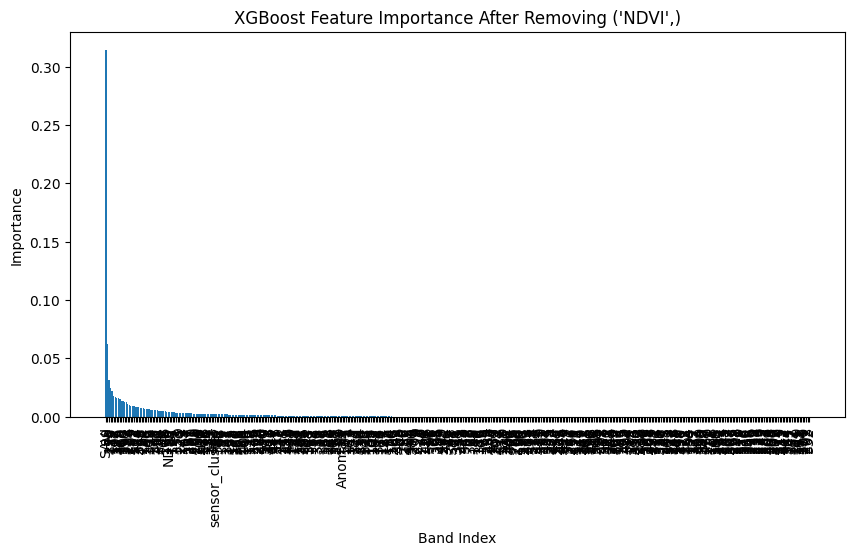

In [117]:
# Display the feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': bands_filtered.columns[sorted_indices],
    'Importance': importances[sorted_indices],
    'Cumulative Importances': np.cumsum(importances[sorted_indices])
})

display(importance_df.head(225))

# Plot the feature importance
plt.figure(figsize=(10, 5))
plt.title(f"XGBoost Feature Importance After Removing {best_removed_cols}")
plt.bar(range(bands_filtered.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(bands_filtered.shape[1]), bands_filtered.columns[sorted_indices], rotation=90)
plt.xlabel("Band Index")
plt.ylabel("Importance")
plt.show()

### Optuna with Cross Validation

In [118]:
import optuna

class TQDMProgressBar:
    def __init__(self, total_trials):
        self.pbar = tqdm(total=total_trials, desc="Optuna Tuning", dynamic_ncols=True)

    def __call__(self, study, trial):
        # Update progress bar for each trial
        self.pbar.update(1)

        # Show the best RMSE during tuning
        if trial.state.is_finished():
            self.pbar.set_postfix({"Best RMSE": study.best_value})

    def close(self):
        self.pbar.close()

In [119]:
new_features_df = latest_features_df.copy()
new_features_df

SAVI        89       170       336       137        72       103  \
0   -0.093526 -1.489991 -1.000000 -0.721447 -0.875571 -1.302124 -1.285167   
1   -0.088937 -2.328138 -1.169204 -0.832637 -1.230848 -2.325760 -2.107500   
2   -2.884617 -2.823409 -3.129423 -3.117791 -3.482262 -2.016263 -3.031929   
3   -1.023318  1.948250  1.001190  0.868632  1.056759  1.998463  1.772476   
4    0.278426 -0.177657 -0.274501 -0.492755 -0.160994 -0.688160 -0.213291   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.257272 -0.923789 -0.092306 -0.517325 -0.381535 -0.643244 -0.877687   
496  1.451216 -0.816052  0.136912  0.237367  0.743192 -1.210247  0.072924   
497 -0.129715  0.164394  0.430103  0.065476  0.172044  0.036208  0.332165   
498  0.149967  0.448357  0.627415  0.664134  0.424635  0.132347  0.943688   
499 -0.793591  0.922210  0.604944  0.773030  0.564398  1.471138  0.198944   

          117       389       375  ...       184       210       191  \
0   -1.187793 -0.962430 -0.714214  ... -0.890408 -1.037412 -0.906927   
1   -1.435548 -0.817885 -0.897765  ... -1.140614 -1.149868 -1.005587   
2   -3.728074 -2.712808 -2.878363  ... -2.998269 -3.302110 -3.434997   
3    1.411211  1.082474  0.916729  ...  1.246139  1.007578  1.294681   
4   -0.112551 -0.376258 -0.259689  ...  0.062062 -0.566207 -0.207620   
..        ...       ...       ...  ...       ...       ...       ...   
495 -0.482388 -0.586798 -0.294150  ... -0.322682 -0.403751 -0.068762   
496 -0.063040  0.227455  0.350340  ...  0.722379  0.485258  0.677218   
497  0.179761  0.539898  0.565264  ...  0.238362 -0.037128  0.090730   
498  0.854089  0.761228  0.788893  ...  0.465275  1.137028  0.894896   
499  0.415676  0.897777  0.762108  ...  0.758147  0.803955  0.615928   

          192       194       317       200       202       203       332  
0   -0.985023 -1.131892 -0.915065 -0.883312 -0.949621 -0.945544 -0.674309  
1   -0.945754 -0.985635 -1.269248 -0.930861 -0.861559 -0.749073 -0.804508  
2   -3.331400 -3.351170 -2.653469 -3.134542 -3.481577 -3.409802 -2.873627  
3    1.380255  1.125188  1.295228  1.094511  1.317648  0.933608  1.005979  
4    0.029393 -0.125109  0.052366 -0.068350 -0.480080 -0.363805 -0.103837  
..        ...       ...       ...       ...       ...       ...       ...  
495 -0.617393 -0.562824 -0.334167 -0.394070 -0.402353 -0.287374 -0.826296  
496  0.457762  0.426404  0.320396  0.600122  0.508106  0.464939  0.423789  
497  0.305889  0.216890  0.314086  0.097025 -0.113183  0.126103  0.131418  
498  0.644415  0.563152  0.648779  0.960705  0.726894  0.761461  0.499206  
499  0.771775  0.307119  0.929153  0.588751  0.636120  0.347647  0.772560  

[500 rows x 452 columns]

In [120]:
# import optuna
# from sklearn.model_selection import KFold, train_test_split
# from sklearn.metrics import root_mean_squared_error

# # Step 1: Hold out a test set (5%) for final evaluation
# X_train_val, X_test, y_train_val, y_test = train_test_split(new_features_df, t, test_size=10, random_state=42)

# # Step 3: Objective Function
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 300, 900),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'max_depth': trial.suggest_int('max_depth', 4, 8),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 50),   # L1 Regularization
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 50), # L2 Regularization
#         'tree_method': 'hist',   # Fast and GPU compatible
#         'device': 'cuda'         # GPU support
#     }

#     # KFold Cross-validation
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
#     cv_results = []

#     with tqdm(total=n_folds, desc=f"Trial {trial.number}", leave=False, dynamic_ncols=True) as pbar:
#         for train_idx, val_idx in kf.split(X_train_val):
#             X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
#             y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

#             model = XGBRegressor(**params)
#             model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

#             rmse_val = root_mean_squared_error(y_val, model.predict(X_val))
#             cv_results.append(rmse_val)

#             pbar.update(1)

#     return np.mean(cv_results)


# # Step 4: Run Optuna with multiprocessing
# n_trials = 100
# n_folds = 5

# # Create Optuna study
# study = optuna.create_study(study_name='XGBoost_GPU_Optimization', direction='minimize', 
#                             pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))

# # Initialize progress bar
# progress_bar = TQDMProgressBar(total_trials=n_trials)

# # Run Optuna with multiprocessing
# study.optimize(objective, n_trials=n_trials, n_jobs=-1, callbacks=[progress_bar])

# # Close the progress bar
# progress_bar.close()

### Optuna without Cross Validation

In [122]:
import optuna

X_train_val, X_test, y_train_val, y_test = train_test_split(new_features_df, target, test_size=10, random_state=42, shuffle=True)  

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

# Step 2: Objective Function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 4, 8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 50),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 50),
        'tree_method': 'hist',
        'device': 'cuda'
    }

    # Fit the model
    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Return Validation RMSE for Optuna to minimize
    return root_mean_squared_error(y_val, y_pred)

# Step 3: Run Optuna
study = optuna.create_study(
    study_name='XGBoost_GPU_Optimization', 
    direction='minimize', 
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=50)
)

n_trials = 200

# Initialize progress bar
# progress_bar = TQDMProgressBar(total_trials=n_trials)

# Run Optuna with multiprocessing
study.optimize(objective, n_trials=n_trials, n_jobs=-1,
#                callbacks=[progress_bar]
              )

# Close the progress bar
# progress_bar.close()

[I 2025-03-15 02:49:19,183] A new study created in memory with name: XGBoost_GPU_Optimization
[I 2025-03-15 02:50:16,644] Trial 0 finished with value: 4170.367168001994 and parameters: {'n_estimators': 371, 'learning_rate': 0.10763991610982031, 'max_depth': 4, 'reg_alpha': 0.49361252230037955, 'reg_lambda': 40.71347805865477}. Best is trial 0 with value: 4170.367168001994.
[I 2025-03-15 02:50:21,975] Trial 10 finished with value: 8100.331669830028 and parameters: {'n_estimators': 423, 'learning_rate': 0.1219028168352602, 'max_depth': 7, 'reg_alpha': 40.013342965932615, 'reg_lambda': 0.28772928676746856}. Best is trial 0 with value: 4170.367168001994.
[I 2025-03-15 02:50:23,499] Trial 13 finished with value: 4758.0453319575845 and parameters: {'n_estimators': 426, 'learning_rate': 0.18658000475290928, 'max_depth': 4, 'reg_alpha': 6.091323748223637, 'reg_lambda': 45.74118506767825}. Best is trial 0 with value: 4170.367168001994.
[I 2025-03-15 02:50:25,894] Trial 9 finished with value: 43

[I 2025-03-15 02:53:04,399] Trial 37 finished with value: 3561.970195199103 and parameters: {'n_estimators': 300, 'learning_rate': 0.12857745002553184, 'max_depth': 6, 'reg_alpha': 49.43885779523666, 'reg_lambda': 6.8023136813939065}. Best is trial 5 with value: 3527.6332156205835.
[I 2025-03-15 02:53:08,061] Trial 38 finished with value: 3609.210779056111 and parameters: {'n_estimators': 300, 'learning_rate': 0.14501537858596897, 'max_depth': 6, 'reg_alpha': 48.49301055165264, 'reg_lambda': 4.833526262274549}. Best is trial 5 with value: 3527.6332156205835.
[I 2025-03-15 02:53:08,371] Trial 36 finished with value: 3471.6158274497993 and parameters: {'n_estimators': 327, 'learning_rate': 0.13701759334115549, 'max_depth': 6, 'reg_alpha': 20.403742767540525, 'reg_lambda': 7.183034691187572}. Best is trial 36 with value: 3471.6158274497993.
[I 2025-03-15 02:53:09,383] Trial 26 finished with value: 3909.3380520011906 and parameters: {'n_estimators': 559, 'learning_rate': 0.0137823513997148

[I 2025-03-15 02:54:56,397] Trial 59 finished with value: 3953.6908057875676 and parameters: {'n_estimators': 349, 'learning_rate': 0.08273734360239406, 'max_depth': 5, 'reg_alpha': 23.872302034996665, 'reg_lambda': 16.603809656349554}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:54:57,162] Trial 56 finished with value: 3856.9649615600188 and parameters: {'n_estimators': 507, 'learning_rate': 0.11743503630877296, 'max_depth': 5, 'reg_alpha': 24.35674805017202, 'reg_lambda': 15.10238045902038}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:55:33,044] Trial 61 finished with value: 3856.2451147196066 and parameters: {'n_estimators': 490, 'learning_rate': 0.08377821967559597, 'max_depth': 5, 'reg_alpha': 37.13157645896899, 'reg_lambda': 14.37882062518129}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:55:34,707] Trial 60 finished with value: 4120.660420442073 and parameters: {'n_estimators': 510, 'learning_rate': 0.1577001457658

[I 2025-03-15 02:57:04,958] Trial 85 finished with value: 3672.059622695092 and parameters: {'n_estimators': 322, 'learning_rate': 0.10706302253618913, 'max_depth': 6, 'reg_alpha': 14.992951623991695, 'reg_lambda': 10.361137586916396}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:57:07,180] Trial 78 finished with value: 3707.4320391525803 and parameters: {'n_estimators': 392, 'learning_rate': 0.1265813512482421, 'max_depth': 7, 'reg_alpha': 13.25495264603676, 'reg_lambda': 9.486512819814827}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:57:09,555] Trial 89 finished with value: 3546.4658100584156 and parameters: {'n_estimators': 318, 'learning_rate': 0.14708383800606042, 'max_depth': 6, 'reg_alpha': 45.868009120908425, 'reg_lambda': 9.225394844794048}. Best is trial 40 with value: 3460.6158430301452.
[I 2025-03-15 02:57:12,387] Trial 90 finished with value: 4120.128110420631 and parameters: {'n_estimators': 319, 'learning_rate': 0.14773723711176

[I 2025-03-15 02:58:54,520] Trial 111 finished with value: 3710.0604924648346 and parameters: {'n_estimators': 362, 'learning_rate': 0.13391299883264127, 'max_depth': 6, 'reg_alpha': 16.88995801344484, 'reg_lambda': 6.393547702600371}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 02:58:57,222] Trial 120 finished with value: 4344.979307651423 and parameters: {'n_estimators': 358, 'learning_rate': 0.14126688258228257, 'max_depth': 4, 'reg_alpha': 19.477497614830806, 'reg_lambda': 1.7673178393724198}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 02:58:57,528] Trial 119 finished with value: 4413.653268298551 and parameters: {'n_estimators': 362, 'learning_rate': 0.09371029588519501, 'max_depth': 4, 'reg_alpha': 20.07333895379918, 'reg_lambda': 1.6912174294065645}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 02:58:58,424] Trial 117 finished with value: 4340.376262046289 and parameters: {'n_estimators': 363, 'learning_rate': 0.0969396411

[I 2025-03-15 03:01:19,105] Trial 149 finished with value: 3780.823848298666 and parameters: {'n_estimators': 300, 'learning_rate': 0.13070825866284683, 'max_depth': 6, 'reg_alpha': 21.38538861279436, 'reg_lambda': 7.55467954644837}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:01:21,570] Trial 150 finished with value: 3598.0082170893243 and parameters: {'n_estimators': 300, 'learning_rate': 0.19696535392533174, 'max_depth': 6, 'reg_alpha': 27.871594767147972, 'reg_lambda': 7.921838394484302}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:01:33,848] Trial 143 finished with value: 3711.6308376666684 and parameters: {'n_estimators': 527, 'learning_rate': 0.11145226587903531, 'max_depth': 6, 'reg_alpha': 3.0387905768732937, 'reg_lambda': 7.618480693444795}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:01:34,070] Trial 144 finished with value: 3925.5050785977646 and parameters: {'n_estimators': 467, 'learning_rate': 0.1856487584

[I 2025-03-15 03:03:54,709] Trial 175 finished with value: 3829.1039335033815 and parameters: {'n_estimators': 537, 'learning_rate': 0.19097775755731602, 'max_depth': 6, 'reg_alpha': 12.777840522338588, 'reg_lambda': 5.63629230644745}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:03:56,827] Trial 170 finished with value: 3758.537355590106 and parameters: {'n_estimators': 577, 'learning_rate': 0.142639679481372, 'max_depth': 6, 'reg_alpha': 12.852008484644275, 'reg_lambda': 11.768935012045272}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:03:57,342] Trial 179 finished with value: 3625.282585612414 and parameters: {'n_estimators': 325, 'learning_rate': 0.1812404160728381, 'max_depth': 6, 'reg_alpha': 30.34516669782167, 'reg_lambda': 8.939101267539316}. Best is trial 100 with value: 3401.108892349777.
[I 2025-03-15 03:03:58,571] Trial 173 finished with value: 3772.1528444598757 and parameters: {'n_estimators': 541, 'learning_rate': 0.1813332845198

In [126]:
print("Best Hyperparameters: ", study.best_params)
print("Best Trial: ", study.best_trial)
# {'n_estimators': 541, 'learning_rate': 0.09622067082662711, 'max_depth': 8, 'reg_alpha': 34.861782385878165, 'reg_lambda': 25.680710017136622}
# {'n_estimators': 309, 'learning_rate': 0.10766564050253832, 'max_depth': 6, 'reg_alpha': 18.024058061766056, 'reg_lambda': 6.033063881192234}


Best Hyperparameters:  {'n_estimators': 309, 'learning_rate': 0.10766564050253832, 'max_depth': 6, 'reg_alpha': 18.024058061766056, 'reg_lambda': 6.033063881192234}
Best Trial:  FrozenTrial(number=100, state=1, values=[3401.108892349777], datetime_start=datetime.datetime(2025, 3, 15, 2, 57, 2, 580788), datetime_complete=datetime.datetime(2025, 3, 15, 2, 58, 4, 328153), params={'n_estimators': 309, 'learning_rate': 0.10766564050253832, 'max_depth': 6, 'reg_alpha': 18.024058061766056, 'reg_lambda': 6.033063881192234}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=700, log=False, low=300, step=1), 'learning_rate': FloatDistribution(high=0.2, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=8, log=False, low=4, step=1), 'reg_alpha': FloatDistribution(high=50.0, log=False, low=0.0, step=None), 'reg_lambda': FloatDistribution(high=50.0, log=False, low=0.0, step=None)}, trial_id=100, value=None)


### Testing Optuna parameters

In [175]:
# Remove the selected columns
bands_filtered = bands.drop(columns=list(best_removed_cols))

X_train_val, X_test, y_train_val, y_test = train_test_split(bands_filtered, target, test_size=10, random_state=42, shuffle=True)  

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

# Get the best hyperparameters from Optuna
best_params = study.best_params

# ✅ Train Final Model on Full Training Data (X_train + X_val)
xgb_model = XGBRegressor(**best_params, tree_method='hist', device='cuda', eval_metric = 'rmse', callbacks=[TQDMCallback(total=study.best_params['n_estimators'])])

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose = False)

# ✅ Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate for Train, Val, and Test
train_metrics = evaluate_metrics(y_train, y_train_pred, X_train)
val_metrics = evaluate_metrics(y_val, y_val_pred, X_val)
test_metrics = evaluate_metrics(y_test, y_test_pred, X_test)

# Combine all results in one DataFrame
results_df = pd.concat([train_metrics, val_metrics, test_metrics], axis=0)
results_df.index = ['Train', 'Validation', 'Test']

# Display Final Results
display(results_df)

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

MSE         RMSE          MAE        R2  Adjusted_R2
Train       1.210798e+03    34.796524     7.663339  0.999993     1.000048
Validation  1.378910e+07  3713.367083  1926.834079  0.909090     1.024840
Test        6.686487e+06  2585.824268  1715.208386  0.989971     1.000204

In [183]:
from sklearn.model_selection import cross_val_score

# Remove the selected columns
bands_filtered = bands.drop(columns=list(best_removed_cols))

# Split data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(bands_filtered, target, test_size=0.10, random_state=42, shuffle=True)

# Further split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

# Get the best hyperparameters from Optuna
best_params = study.best_params

# Define the XGBRegressor model using the best hyperparameters, but without GPU usage for cross-validation
xgb_model = XGBRegressor(
    **best_params,
    tree_method='hist',  # Use histogram-based method for faster training
    eval_metric='rmse',
)

# Use cross-validation for model evaluation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # Using negative RMSE

# Calculate the mean and standard deviation of the CV scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

xgb_model = XGBRegressor(
    **best_params,
    tree_method='hist',  # Use histogram-based method for faster training
    device='cuda',  # Enable GPU usage for final training
    eval_metric='rmse',
)

# Fit the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate for Train, Val, and Test
train_metrics = evaluate_metrics(y_train, y_train_pred, X_train)
val_metrics = evaluate_metrics(y_val, y_val_pred, X_val)
test_metrics = evaluate_metrics(y_test, y_test_pred, X_test)

# Combine all results in one DataFrame
results_df = pd.concat([train_metrics, val_metrics, test_metrics], axis=0)

# Add Cross-Validation metrics to the results
cv_metrics = pd.DataFrame({'CV Mean RMSE': [mean_cv_score], 'CV Std RMSE': [std_cv_score]})
cv_metrics.index = ['Cross Validation']

# Append CV results to the final DataFrame
results_df = pd.concat([cv_metrics, results_df], axis=0)

# Display Final Results
display(results_df)

CV Mean RMSE  CV Std RMSE           MSE          RMSE  \
Cross Validation -11429.737319  4660.220197           NaN           NaN   
0                          NaN          NaN  7.087366e+02     26.622107   
0                          NaN          NaN  8.414362e+07   9172.982887   
0                          NaN          NaN  3.874951e+08  19684.895208   

                          MAE        R2  Adjusted_R2  
Cross Validation          NaN       NaN          NaN  
0                    7.373839  0.999996     1.000014  
0                 2949.258728  0.084372     1.224493  
0                 5338.704678 -1.565663     1.311954

In [184]:
cv_scores

array([-14622.23037914, -10065.63820899, -12251.38973284,  -3309.53210997,
       -16899.89616165])

In [169]:
import xgboost as xgb

# Remove the selected columns
bands_filtered = bands.drop(columns=list(best_removed_cols))

X_train_val, X_test, y_train_val, y_test = train_test_split(bands_filtered, target, test_size=10, random_state=42, shuffle=True)  

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, shuffle=True)

# Get the best hyperparameters from Optuna
best_params = study.best_params

# Setup the parameters
params = best_params.copy()
params.update({
    'tree_method': 'hist',  # Make sure tree_method is in the params
    'eval_metric': 'rmse',
    'device': 'cuda'
})
params.pop('n_estimators', None)

# Set the number of folds for cross-validation
n_splits = 5

# Prepare DMatrix for XGBoost CV
dtrain = xgb.DMatrix(X_train_val, label=y_train_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Perform Cross Validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    nfold=n_splits,  # number of folds
    metrics=["rmse"],  # list of evaluation metrics
    as_pandas=True,  # return the results as a pandas DataFrame
    seed=42  # for reproducibility
)

# Train the final model with the best hyperparameters and boosting rounds
xgb_model = xgb.XGBRegressor(
    **params,
)

# Train the final model on the entire training set (X_train + X_val)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# ✅ Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate for Train, Val, and Test
train_metrics = evaluate_metrics(y_train, y_train_pred, X_train)
val_metrics = evaluate_metrics(y_val, y_val_pred, X_val)
test_metrics = evaluate_metrics(y_test, y_test_pred, X_test)

# Combine all results in one DataFrame
results_df = pd.concat([train_metrics, val_metrics, test_metrics], axis=0)
results_df.index = ['Train', 'Validation', 'Test']

# Display Final Results
display(results_df)

MSE         RMSE          MAE        R2  Adjusted_R2
Train       7.041919e+05   839.161404   185.315238  0.995664     1.027791
Validation  1.340110e+07  3660.751202  1905.534466  0.911648     1.024141
Test        6.264108e+06  2502.820066  1673.086914  0.990604     1.000191

In [170]:
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     12001.546898      545.733920    11987.193896    2384.954594
1     11396.303573      500.770300    11574.481423    2407.157561
2     10827.499194      459.972768    11212.398325    2404.776392
3     10291.859309      422.802515    10898.832581    2378.013394
4      9786.192182      389.168612    10627.095012    2329.480872
5      9308.956864      359.893069    10396.026505    2265.387271
6      8858.513704      334.855932    10202.689354    2196.909757
7      8432.914855      312.226196    10038.879211    2121.525254
8      8033.066763      292.054176     9905.265021    2040.013094
9      7654.397721      275.847940     9789.583228    1969.230299

### Cross Validation on Hyperparamatized Model

In [167]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_val, X_test, y_train_val, y_test = train_test_split(new_features_df, target, test_size=10, random_state=42, shuffle = True)

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)  # Updated for sklearn 1.4+
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics & datasets for each fold
cv_results = []
datasets = []

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_val), 1):
    
    # 🎯 Get Train and Validation Data for this Fold
    X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

    # 🎯 Save Train, Val, Test Sets for this Fold
    datasets.append({
        'Fold': fold,
        'Train': X_train,
        'Val': X_val,
        'Test': X_test
    })
    # Get the best hyperparameters from Optuna
    best_params = study.best_params

    # ✅ Train Final Model on Full Training Data (X_train + X_val)
    xgb_model = XGBRegressor(**best_params, tree_method='hist', device='cuda', eval_metric = 'rmse', callbacks=[TQDMCallback(total=study.best_params['n_estimators'])])

    # ✅ Train Model
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # ✅ Predictions
    y_train_pred = xgb_model.predict(X_train)
    y_val_pred = xgb_model.predict(X_val)
    y_test_pred = xgb_model.predict(X_test)

    # ✅ Metrics Calculation for Each Fold
    metrics = {
        'Train': evaluate_metrics(y_train, y_train_pred, X_train),
        'Validation': evaluate_metrics(y_val, y_val_pred, X_val),
        'Test': evaluate_metrics(y_test, y_test_pred, X_test)
    }

    # ✅ Append Results
    cv_results.append(metrics)

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/309 [00:00<?, ?it/s]

In [168]:
# Separate Train, Validation, and Test Metrics
train_metrics = pd.concat([fold['Train'] for fold in cv_results], ignore_index=True)
val_metrics = pd.concat([fold['Validation'] for fold in cv_results], ignore_index=True)
test_metrics = pd.concat([fold['Test'] for fold in cv_results], ignore_index=True)

# Visualize
display(train_metrics)
display(val_metrics)
display(test_metrics)

MSE       RMSE        MAE        R2  Adjusted_R2
0  1210.798094  34.796524   7.663339  0.999993     1.000048
1   914.583073  30.242075   9.902300  0.999995     1.000035
2   499.745182  22.354981   7.427722  0.999996     1.000024
3   710.791751  26.660678   9.278299  0.999996     1.000025
4  1161.642784  34.082881  13.200733  0.999993     1.000047

MSE          RMSE          MAE        R2  Adjusted_R2
0  1.156754e+07   3401.108892  1938.815622  0.923736     1.020838
1  1.118199e+08  10574.492576  3205.079612  0.164332     1.228338
2  3.911755e+07   6254.402071  2292.925616  0.850036     1.040976
3  2.868024e+08  16935.240707  3984.907775 -2.650791     1.997540
4  6.799318e+07   8245.797849  2867.612499  0.607880     1.107143

MSE         RMSE          MAE        R2  Adjusted_R2
0  1.009033e+07  3176.528159  1908.536877  0.984865     1.000307
1  2.445040e+07  4944.734626  2383.758533  0.963326     1.000745
2  8.747137e+06  2957.555941  1696.477869  0.986880     1.000267
3  9.653596e+06  3107.023595  2000.340088  0.985520     1.000294
4  5.892440e+06  2427.434951  1771.119397  0.991162     1.000180

In [48]:
import torch
torch.cuda.is_available()

True

In [49]:
torch.version.cuda

'12.4'